# TECH CHALLENGE ~ Fase 03

Gupo 03 - Composto por:
- André Antônio Campos
- Tamires Cristofani Suhadolnik
- Debora Fabiana Pascoarelli
- Clayton Gonçalves dos Santos
- Igor Torves

Este trabalho explora a importância de compreender o comportamento da população durante a pandemia de COVID-19.

Iniciaremos com uma Análise Exploratória dos Dados, focando em indicadores essenciais para essa compreensão, como a Identificação e Controle e as principais características gerais dos moradores em nível nacional.

Além disso, nosso projeto visa fornecer informações valiosas sobre as causas e resultados das infecções, as estratégias de recuperação implementadas, e as possíveis melhorias que poderiam ter sido feitas. O objetivo é gerar insights que ajudem a mitigar futuras ocorrências semelhantes e aprimorar a resposta a situações de emergência.  

Período Analisado:
- Ano: 2020
- Meses: Maio, Junho e Julho

Fonte: base  de  dados  do 
PNAD-COVID-19 do IBGE (https://covid19.ibge.gov.br/pnad-covid/)

## Importação da base de dados do BigQuery

In [1]:
!pip install google-cloud-bigquery pandas
!pip install db-dtypes

In [2]:
from google.cloud import bigquery
import db_dtypes
import pandas as pd

import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'Dados/credenciais.json'

import warnings
warnings.filterwarnings('ignore')

In [3]:
client = bigquery.Client()

In [208]:
query = """
        SELECT *
        FROM `plucky-tract-434600-b8.tech_challeng_fase_03.PNAD_COVID_19`
        LIMIT 100
"""

In [209]:
dados = client.query(query).to_dataframe()

In [210]:
dados.head()

,ano,mes,semana,sigla_uf,capital,rm_ride,estrato,upa,v1008,v1016,v1022,v1023,v1030,v1031,v1032,posest,a001,a001a,a001b1,a001b2,a001b3,a002,a003,a004,a005,a006,a006a,a006b,a007,a007a,a008,a009,b0011,b0012,b0013,b0014,b0015,b0016,b0017,b0018,b0019,b00110,b00111,b00112,b00113,b002,b0031,b0032,b0033,b0034,b0035,b0036,b0037,b0041,b0042,b0043,b0044,b0045,b0046,b005,b006,b007,b008,b009a,b009b,b009c,b009d,b009e,b009f,b0101,b0102,b0103,b0104,b0105,b0106,b011,c001,c002,c003,c004,c005,c0051,c0052,c0053,c006,c007,c007a,c007b,c007c,c007d,c007e,c007e1,c007e2,c007f,c008,c009,c009a,c010,c0101,c01011,c01012,c0102,c01021,c01022,c0103,c0104,c011a,c011a1,c011a11,c011a12,c011a2,c011a21,c011a22,c012,c013,c014,c015,c016,c017a,d0011,d0013,d0021,d0023,d0031,d0033,d0041,d0043,d0051,d0053,d0061,d0063,d0071,d0073,e001,e0021,e0022,e0023,e0024,f001,f0021,f0022,f002a1,f002a2,f002a3,f002a4,f002a5,f0061,f006
0,2020,5,3,AP,16,16,1610120,160000808,4,1,2,1,77748,726.8868,1007.0400,1621,7,10,24,4,2019,1,2,4,1,None,None,None,None,None,None,None,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,<NA>,<NA>,<NA>,None,None,None,None,None,None,None,<NA>,<NA>,None,<NA>,<NA>,None,None,None,None,NaN,None,None,NaN,None,None,None,None,None,NaN,None,None,NaN,None,None,None,None,None,None,1,800.0,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,None,None,None,None,None,1,NaN,None,None,None,None,None,None,1,1
1,2020,5,1,AP,16,16,1610112,160001352,8,1,1,1,52329,116.1243,146.7909,1625,2,2,18,10,1977,42,2,4,2,None,None,None,None,None,None,None,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,None,None,None,None,<NA>,<NA>,<NA>,2,8,None,None,6,6,None,<NA>,<NA>,None,30,15,None,1,None,None,NaN,None,None,NaN,None,4,None,None,None,NaN,None,None,NaN,1,None,2,None,None,None,2,NaN,2,NaN,1,240.0,2,NaN,1,600.0,2,NaN,2,NaN,None,None,None,None,None,1,NaN,None,None,None,None,None,None,1,7
2,2020,5,4,AP,16,16,1610111,160002791,5,1,1,1,50753,240.6335,280.9112,1615,2,2,99,99,9999,48,1,4,5,None,None,None,None,None,None,None,1,2,2,1,1,2,2,1,2,2,2,2,None,2,1,2,1,2,2,2,2,None,None,None,None,None,None,None,None,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2,2,None,None,None,<NA>,<NA>,<NA>,None,None,None,None,None,None,None,<NA>,<NA>,None,<NA>,<NA>,None,None,None,None,NaN,None,None,NaN,None,None,None,None,None,NaN,None,None,NaN,None,None,2,2,1,2,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,None,None,None,None,None,1,NaN,None,None,None,None,None,None,1,4
3,2020,5,1,AP,16,16,1610111,160004439,1,1,1,1,80743,164.1043,203.2837,1622,2,5,27,7,2006,13,2,1,2,None,None,None,None,None,None,None,2,1,1,2,1,2,2,1,2,2,2,2,None,2,2,2,2,2,2,2,2,None,None,None,None,None,None,None,None,2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,<NA>,<NA>,<NA>,None,None,None,None,None,None,None,<NA>,<NA>,None,<NA>,<NA>,None,None,None,None,NaN,None,None,NaN,None,None,None,None,None,NaN,None,None,NaN,None,None,None,None,None,None,1,3500.0,1,1700.0,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,None,None,None,None,None,1,NaN,None,None,None,None,None,None,1,1
4,2020,5,2,AP,16,16,1610111,160004900,12,1,1,1,50753,153.3653,179.0358,1615,1,1,23,12,1978,41,1,4,6,None,None,None,None,None,None,None,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,None,None,None,None,<NA>,<NA>,<NA>,2,4,None,1,29,17,None,<NA>,<NA>,None,40,42,None,1,1,4,1500.0,None,None,NaN,None,None,1,1,4,1050.0,None,None,NaN,1,None,None,None,None,None,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1100.0,2,NaN,None,None,None,None,None,5,NaN,None,None,None,None,None,None,1,1


In [166]:
print(dados.columns)

Index(['ano', 'mes', 'semana', 'sigla_uf', 'capital', 'rm_ride', 'estrato',
       'upa', 'v1008', 'v1016',
       ...
       'f001', 'f0021', 'f0022', 'f002a1', 'f002a2', 'f002a3', 'f002a4',
       'f002a5', 'f0061', 'f006'],
      dtype='object', length=148)


No Select abaixo é possível identificar os itens escolhidos para o discorrer das nossas análises e resultados

## Base de Dados

In [167]:
query = """
        SELECT
         a.ano
        ,a.mes
        ,a.semana
        ,a.sigla_uf
        ,a.capital
        ,a.rm_ride
        ,a.estrato
        ,a.upa
        ,a.V1022 as id_situacao_domicilio
        ,a.A001B3 as ano_nascimento
        ,a.A002 as idade_morador
        ,a.A003 as id_sexo
        ,a.A004 as id_cor_raca 
        ,a.A005 as id_escolaridade 
        ,a.B0011 as id_febre_sm
        ,a.B0012 as id_tosse_sm   
        ,a.B0013 as id_dor_garganta_sm    
        ,a.B0014 as id_dif_respirar_sm   
        ,a.B0015 as id_dor_cabeca_sm 
        ,a.B0016 as id_dor_peito_sm
        ,a.B0017 as id_nausea_sm
        ,a.B0018 as id_nariz_entupido_sm
        ,a.B0019 as id_fadiga_sm
        ,a.B00110 as id_dor_olhos_sm
        ,a.B00111 as id_perda_cheiro_sabor_sm
        ,a.B00112 as id_dor_muscular_sm
        ,a.B0033 AS id_remedio_conta_propria
        ,a.B0034 as id_remedio_orientacao_medica
        ,a.B005  as id_internado_1_mais  
        ,a.B006  as id_sedado_entubado  
        ,a.C007B  as id_clt_funcpublico
        ,a.C007C  as id_tipo_trabalho
        ,a.C01011 as id_faixa_rendimento
        ,a.D0051 as id_auxilio_emergencial
        ,a.D0053 as tt_valores_recebidos
        ,a.F001 as tipo_domicilio

        FROM `plucky-tract-434600-b8.tech_challeng_fase_03.PNAD_COVID_19` a
        LIMIT 100
"""

In [168]:
dados = client.query(query).to_dataframe()

In [169]:
dados.head()

,ano,mes,semana,sigla_uf,capital,rm_ride,estrato,upa,id_situacao_domicilio,ano_nascimento,idade_morador,id_sexo,id_cor_raca,id_escolaridade,id_febre_sm,id_tosse_sm,id_dor_garganta_sm,id_dif_respirar_sm,id_dor_cabeca_sm,id_dor_peito_sm,id_nausea_sm,id_nariz_entupido_sm,id_fadiga_sm,id_dor_olhos_sm,id_perda_cheiro_sabor_sm,id_dor_muscular_sm,id_remedio_conta_propria,id_remedio_orientacao_medica,id_internado_1_mais,id_sedado_entubado,id_clt_funcpublico,id_tipo_trabalho,id_faixa_rendimento,id_auxilio_emergencial,tt_valores_recebidos,tipo_domicilio
0,2020,5,3,AP,16,16,1610120,160000808,2,2019,1,2,4,1,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,None,None,None,1,1200.0,1
1,2020,5,1,AP,16,16,1610112,160001352,1,1977,42,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,None,6,None,1,600.0,1
2,2020,5,4,AP,16,16,1610111,160002791,1,9999,48,1,4,5,1,2,2,1,1,2,2,1,2,2,2,2,1,2,None,None,None,None,None,2,NaN,1
3,2020,5,1,AP,16,16,1610111,160004439,1,2006,13,2,1,2,2,1,1,2,1,2,2,1,2,2,2,2,2,2,None,None,None,None,None,2,NaN,1
4,2020,5,2,AP,16,16,1610111,160004900,1,1978,41,1,4,6,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,1,29,4,2,NaN,5


In [170]:
import pandas as pd

# Configurar pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)

# Agora você pode exibir o DataFrame
display(dados)


,ano,mes,semana,sigla_uf,capital,rm_ride,estrato,upa,id_situacao_domicilio,ano_nascimento,idade_morador,id_sexo,id_cor_raca,id_escolaridade,id_febre_sm,id_tosse_sm,id_dor_garganta_sm,id_dif_respirar_sm,id_dor_cabeca_sm,id_dor_peito_sm,id_nausea_sm,id_nariz_entupido_sm,id_fadiga_sm,id_dor_olhos_sm,id_perda_cheiro_sabor_sm,id_dor_muscular_sm,id_remedio_conta_propria,id_remedio_orientacao_medica,id_internado_1_mais,id_sedado_entubado,id_clt_funcpublico,id_tipo_trabalho,id_faixa_rendimento,id_auxilio_emergencial,tt_valores_recebidos,tipo_domicilio
0,2020,5,3,AP,16,16,1610120,160000808,2,2019,1,2,4,1,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,None,None,None,1,1200.0,1
1,2020,5,1,AP,16,16,1610112,160001352,1,1977,42,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,None,6,None,1,600.0,1
2,2020,5,4,AP,16,16,1610111,160002791,1,9999,48,1,4,5,1,2,2,1,1,2,2,1,2,2,2,2,1,2,None,None,None,None,None,2,NaN,1
3,2020,5,1,AP,16,16,1610111,160004439,1,2006,13,2,1,2,2,1,1,2,1,2,2,1,2,2,2,2,2,2,None,None,None,None,None,2,NaN,1
4,2020,5,2,AP,16,16,1610111,160004900,1,1978,41,1,4,6,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,1,29,4,2,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020,7,3,AC,None,None,1250010,120010584,1,2010,9,1,4,2,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,None,None,None,1,600.0,1
96,2020,8,2,AC,None,None,1250010,120000412,1,1975,44,1,4,2,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,3,23,4,1,600.0,1
97,2020,8,1,AC,None,None,1250010,120000412,1,1996,24,1,4,4,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,None,None,None,2,NaN,1
98,2020,8,2,AC,None,None,1250010,120000843,1,2015,5,1,4,1,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,None,None,None,2,NaN,1


In [171]:
print(dados.dtypes)

ano                               Int64
mes                               Int64
semana                            Int64
sigla_uf                         object
capital                          object
rm_ride                          object
estrato                          object
upa                              object
id_situacao_domicilio            object
ano_nascimento                    Int64
idade_morador                    object
id_sexo                          object
id_cor_raca                      object
id_escolaridade                  object
id_febre_sm                      object
id_tosse_sm                      object
id_dor_garganta_sm               object
id_dif_respirar_sm               object
id_dor_cabeca_sm                 object
id_dor_peito_sm                  object
id_nausea_sm                     object
id_nariz_entupido_sm             object
id_fadiga_sm                     object
id_dor_olhos_sm                  object
id_perda_cheiro_sabor_sm         object


## Análise Exploratória: Características gerais dos moradores

In [172]:
query2 = """
        SELECT
         a.ano
        ,a.mes
        ,a.semana
        ,a.sigla_uf
        ,a.capital
        ,a.rm_ride
        ,a.estrato
        ,a.upa
        ,CASE
                WHEN CAST(a.V1022 AS INT64) = 1 THEN 'Urbana'
                WHEN CAST(a.V1022 AS INT64) = 2 THEN 'Rural'
                ELSE 'Desconhecido'
        END AS id_situacao_domicilio
        ,a.A001B3 as ano_nascimento
        ,a.A002 as idade_morador
        ,CASE
                WHEN CAST(a.A003 AS INT64) = 1 THEN 'Masculino'
                WHEN CAST(a.A003 AS INT64) = 2 THEN 'Feminino'
                ELSE 'Desconhecido'
        END AS id_sexo_label
        
        ,CASE
               WHEN CAST(a.A004 AS INT64) = 1 THEN 'Branca'
               WHEN CAST(a.A004 AS INT64) = 2 THEN 'Preta'
               WHEN CAST(a.A004 AS INT64) = 3 THEN 'Amarela'
               WHEN CAST(a.A004 AS INT64) = 4 THEN 'Parda'
               WHEN CAST(a.A004 AS INT64) = 5 THEN 'Indígena'
               ELSE 'Ignorada'
        END AS id_cor_raca   
       
        ,CASE
               WHEN CAST(a.A005 AS INT64) = 1 THEN 'S/ Inst'
               WHEN CAST(a.A005 AS INT64) = 2 THEN 'Fund. Incompl.'
               WHEN CAST(a.A005 AS INT64) = 3 THEN 'Fund. Compl.'
               WHEN CAST(a.A005 AS INT64) = 4 THEN 'Médio Incompl.'
               WHEN CAST(a.A005 AS INT64) = 5 THEN 'Médio Compl.'
               WHEN CAST(a.A005 AS INT64) = 6 THEN 'Sup. Incompl.'
               WHEN CAST(a.A005 AS INT64) = 7 THEN 'Sup Compl.'
               ELSE 'Pós, Mest, Dout'
        END AS id_escolaridade      
        FROM `plucky-tract-434600-b8.tech_challeng_fase_03.PNAD_COVID_19` a
        where a.mes between 5 and 7
        
"""

In [173]:
dados2 = client.query(query2).to_dataframe()

In [174]:
display(dados2)

,ano,mes,semana,sigla_uf,capital,rm_ride,estrato,upa,id_situacao_domicilio,ano_nascimento,idade_morador,id_sexo_label,id_cor_raca,id_escolaridade
0,2020,5,1,AP,16,16,1610112,160001352,Urbana,1977,42,Feminino,Parda,Fund. Incompl.
1,2020,5,4,AP,16,16,1610111,160002791,Urbana,9999,48,Masculino,Parda,Médio Compl.
2,2020,5,1,AP,16,16,1610111,160004439,Urbana,2006,13,Feminino,Branca,Fund. Incompl.
3,2020,5,2,AP,None,16,1620010,160007354,Urbana,2005,14,Masculino,Parda,Médio Incompl.
4,2020,6,1,AP,16,16,1610111,160002374,Urbana,1994,25,Feminino,Branca,Sup Compl.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114737,2020,7,1,MG,None,None,3151021,310354742,Rural,2009,11,Masculino,Branca,Fund. Incompl.
1114738,2020,7,2,MG,None,None,3153013,310361290,Urbana,1991,28,Masculino,Branca,Médio Compl.
1114739,2020,7,3,MG,None,None,3151011,310378066,Urbana,2003,17,Feminino,Branca,Médio Incompl.
1114740,2020,7,4,MG,None,None,3156011,310401930,Urbana,1948,72,Masculino,Branca,Fund. Incompl.


In [175]:
quantidade_meses = dados2['mes'].nunique()
print(f"Quantidade de meses distintos: {quantidade_meses}")

Quantidade de meses distintos: 3


### Distribuição etária dos Moradores

In [176]:
# Converter a coluna 'idade_morador' para numérico, forçando erros a se tornarem NaN
dados2['idade_morador'] = pd.to_numeric(dados2['idade_morador'], errors='coerce')

# Categorizar a idade em faixas etárias
dados2['faixa_etaria'] = pd.cut(dados2['idade_morador'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])

# Contar a quantidade de moradores por faixa etária
distribuicao_etaria = dados2['faixa_etaria'].value_counts()
print(distribuicao_etaria)

faixa_etaria
0-18     272577
19-35    268379
36-50    244507
51-65    199437
65+      120797
Name: count, dtype: int64


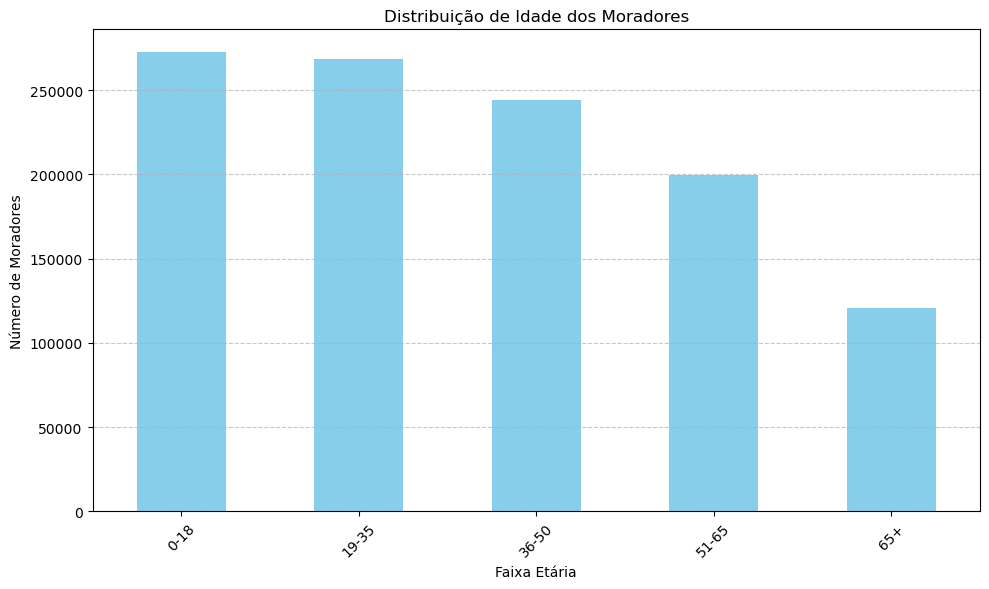

In [177]:
import matplotlib.pyplot as plt

# Converter a coluna 'idade_morador' para numérico, forçando erros a se tornarem NaN
dados2['idade_morador'] = pd.to_numeric(dados2['idade_morador'], errors='coerce')

# Categorizar a idade em faixas etárias
dados2['faixa_etaria'] = pd.cut(dados2['idade_morador'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])

# Contar a quantidade de moradores por faixa etária
distribuicao_etaria = dados2['faixa_etaria'].value_counts().sort_index()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
distribuicao_etaria.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Idade dos Moradores')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Moradores')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()


### Proporção de Moradores por Sexo

In [178]:
# Contar a quantidade de moradores por sexo
proporcao_sexo = dados2['id_sexo_label'].value_counts(normalize=True) * 100
print(proporcao_sexo)

id_sexo_label
Feminino     51.985033
Masculino    48.014967
Name: proportion, dtype: float64


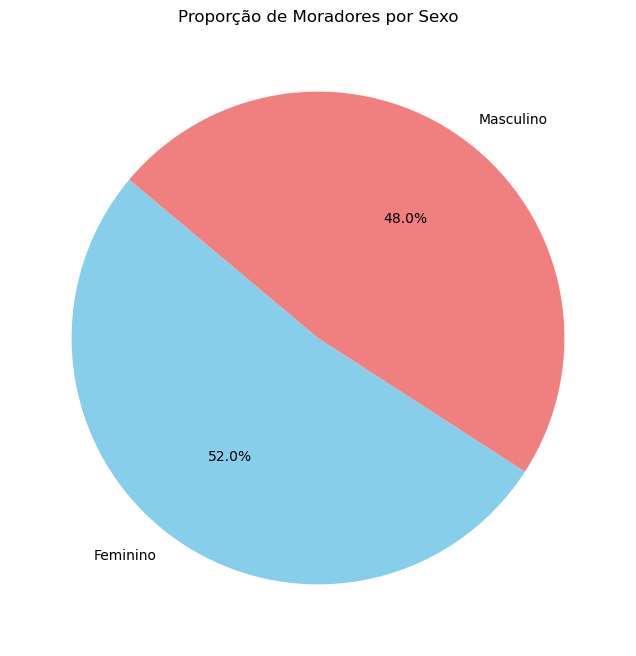

In [179]:
# Contar a quantidade de moradores por sexo e calcular a proporção
proporcao_sexo = dados2['id_sexo_label'].value_counts(normalize=True) * 100

# Plotar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(proporcao_sexo, labels=proporcao_sexo.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('Proporção de Moradores por Sexo')

# Exibir o gráfico
plt.show()

### Escolaridade da População

In [180]:
# Contar a quantidade de pessoas por nível de escolaridade
distribuicao_escolaridade = dados2['id_escolaridade'].value_counts()
print(distribuicao_escolaridade)

id_escolaridade
Fund. Incompl.     372947
Médio Compl.       250790
S/ Inst            118887
Sup Compl.         106409
Médio Incompl.     104715
Fund. Compl.        74622
Sup. Incompl.       58131
Pós, Mest, Dout     28241
Name: count, dtype: int64


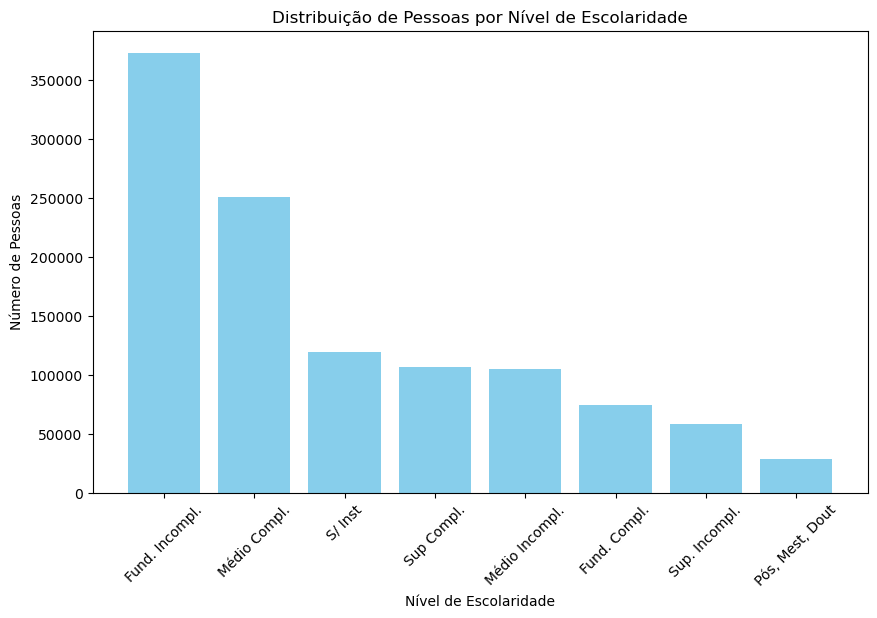

In [181]:
# Contar a quantidade de pessoas por nível de escolaridade
distribuicao_escolaridade = dados2['id_escolaridade'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(distribuicao_escolaridade.index, distribuicao_escolaridade.values, color='skyblue')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição de Pessoas por Nível de Escolaridade')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Exibir o gráfico
plt.show()

### Distribuição Geográfica por UF

In [182]:
# Contar a quantidade de moradores por estado (sigla_uf)
distribuicao_uf = dados2['sigla_uf'].value_counts()
display(distribuicao_uf)


sigla_uf
SP    103897
MG    101557
RJ     83367
SC     68356
RS     64868
PR     58938
BA     52131
MA     51728
CE     49691
PE     45860
ES     43389
GO     40062
AL     34828
MT     33454
PA     33235
PB     28156
AM     27975
MS     25473
SE     24969
PI     24516
RN     24385
DF     19682
AC     19203
TO     15848
RO     15775
RR     14537
AP      8862
Name: count, dtype: int64

### Gráfico de Distribuição por Estado

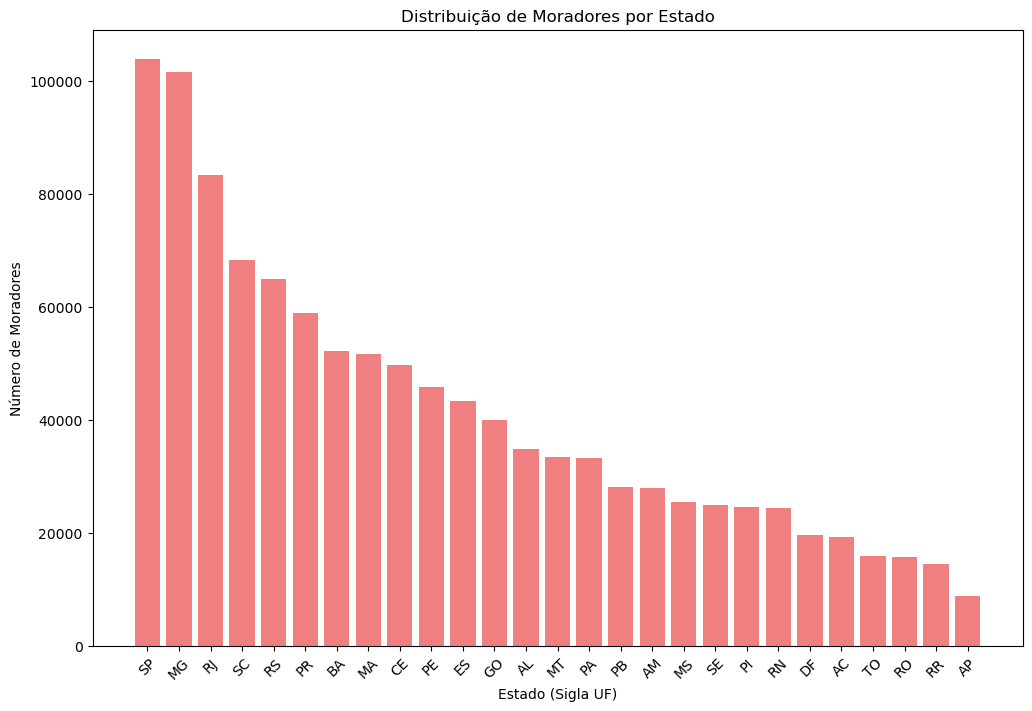

In [183]:
# Contar a quantidade de moradores por estado (sigla_uf)
distribuicao_uf = dados2['sigla_uf'].value_counts()

# Plotar o gráfico de barras para a distribuição por estado
plt.figure(figsize=(12, 8))
plt.bar(distribuicao_uf.index, distribuicao_uf.values, color='lightcoral')
plt.xlabel('Estado (Sigla UF)')
plt.ylabel('Número de Moradores')
plt.title('Distribuição de Moradores por Estado')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Exibir o gráfico
plt.show()

### Distribuição por Situação Domiciliar

In [184]:
# Contar a quantidade de pessoas por situação domiciliar
distribuicao_situacao_domicilio = dados2['id_situacao_domicilio'].value_counts()
print(distribuicao_situacao_domicilio)

id_situacao_domicilio
Urbana    855359
Rural     259383
Name: count, dtype: int64


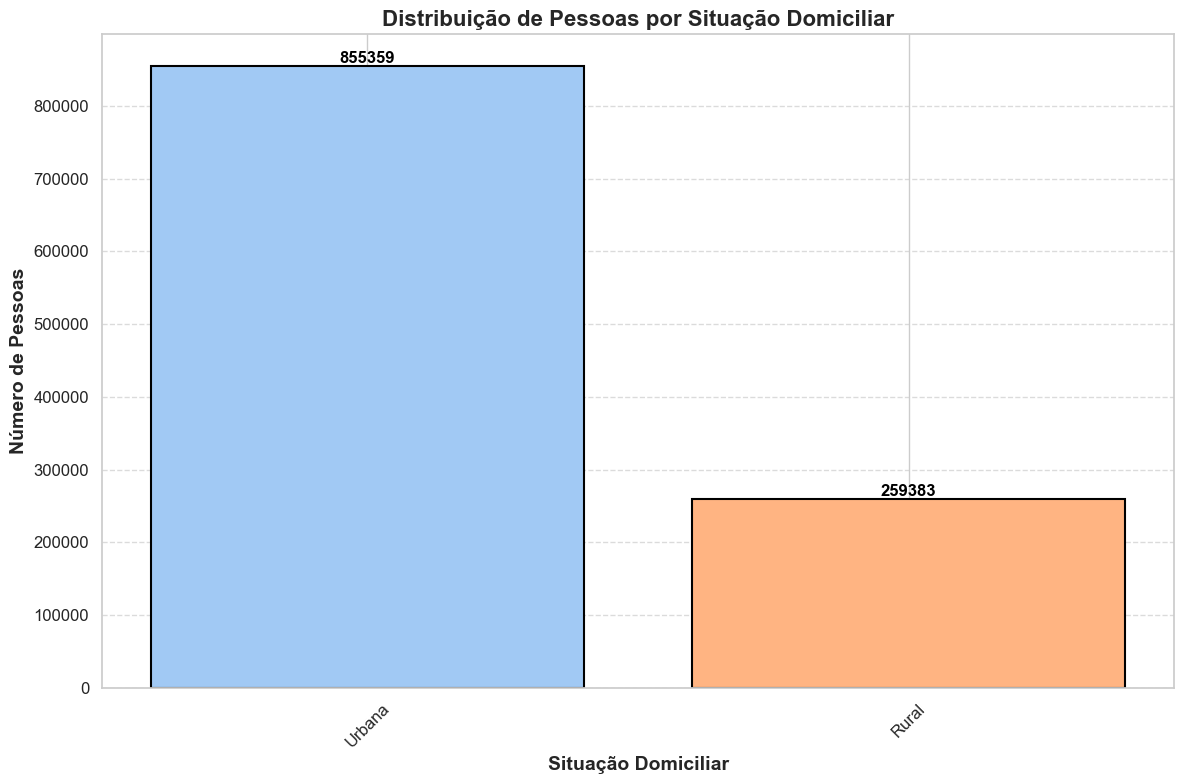

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir o estilo
sns.set(style='whitegrid')

# Contar a quantidade de pessoas por situação domiciliar
distribuicao_situacao_domicilio = dados3['id_situacao_domicilio'].value_counts()

# Definir uma paleta de cores
cores = sns.color_palette('pastel', len(distribuicao_situacao_domicilio))

# Plotar o gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(distribuicao_situacao_domicilio.index.astype(str), 
                distribuicao_situacao_domicilio.values, 
                color=cores, 
                edgecolor='black',  # Bordas pretas
                linewidth=1.5)

# Adicionar valores em cima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), 
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Personalizar os rótulos e título
plt.xlabel('Situação Domiciliar', fontsize=14, fontweight='bold')
plt.ylabel('Número de Pessoas', fontsize=14, fontweight='bold')
plt.title('Distribuição de Pessoas por Situação Domiciliar', fontsize=16, fontweight='bold')

# Adicionar grade horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45, fontsize=12)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.yticks(fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()


### Distribuição de Cor e Raça

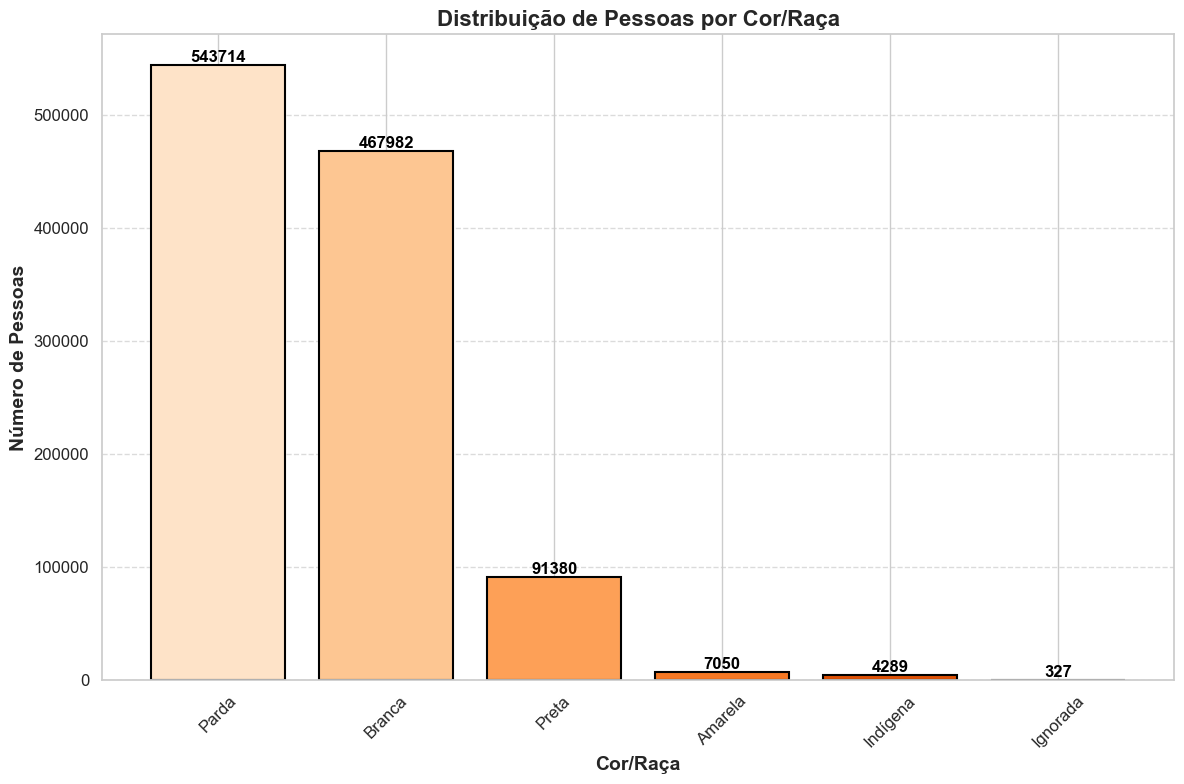

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir o estilo
sns.set(style='whitegrid')

# Contar a quantidade de pessoas por cor/raça
distribuicao_cor_raca = dados3['id_cor_raca'].value_counts()

# Definir uma paleta de cores quentes
cores = sns.color_palette('Oranges', len(distribuicao_cor_raca))

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(distribuicao_cor_raca.index.astype(str), 
                distribuicao_cor_raca.values, 
                color=cores, 
                edgecolor='black',  # Bordas pretas
                linewidth=1.5)

# Adicionar valores em cima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), 
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Personalizar os rótulos e título
plt.xlabel('Cor/Raça', fontsize=14, fontweight='bold')
plt.ylabel('Número de Pessoas', fontsize=14, fontweight='bold')
plt.title('Distribuição de Pessoas por Cor/Raça', fontsize=16, fontweight='bold')

# Adicionar grade horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45, fontsize=12)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.yticks(fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()

#### Análise Correlação:  Cor e Raça x Nível de Escolaridade

In [187]:
# Contar a quantidade de pessoas por cor/raca e nível de escolaridade
contagem_cor_raca_escolaridade = pd.crosstab(dados2['id_cor_raca'], dados2['id_escolaridade'])

print(contagem_cor_raca_escolaridade)

id_escolaridade  Fund. Compl.  Fund. Incompl.  Médio Compl.  Médio Incompl.  \
id_cor_raca                                                                   
Amarela                   429            1735          1620             641   
Branca                  32920          141147        101712           37535   
Ignorada                   27             102            57              27   
Indígena                  270            1468          1022             471   
Parda                   34351          198613        123010           56466   
Preta                    6625           29882         23369            9575   

id_escolaridade  Pós, Mest, Dout  S/ Inst  Sup Compl.  Sup. Incompl.  
id_cor_raca                                                           
Amarela                      310      538        1292            485  
Branca                     18021    45492       62051          29104  
Ignorada                      15       65          24             10  
Indígena    

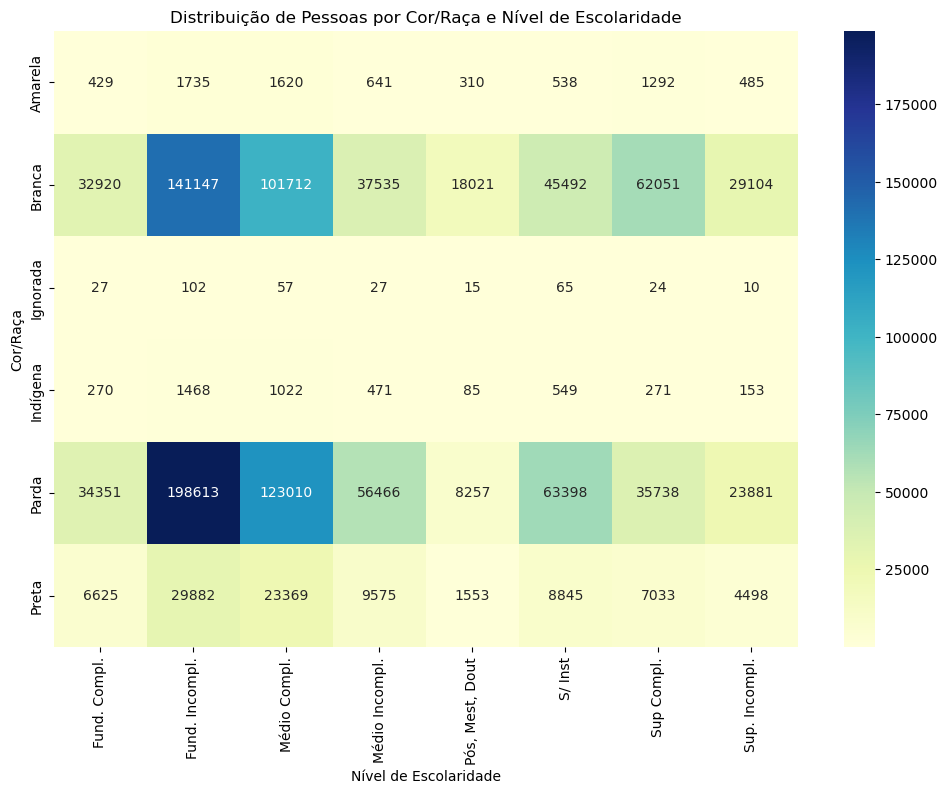

In [188]:
import seaborn as sns
# Contar a quantidade de pessoas por cor/raca e nível de escolaridade
contagem_cor_raca_escolaridade = pd.crosstab(dados2['id_cor_raca'], dados2['id_escolaridade'])

# Criar o gráfico de calor
plt.figure(figsize=(12, 8))
sns.heatmap(contagem_cor_raca_escolaridade, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Cor/Raça')
plt.title('Distribuição de Pessoas por Cor/Raça e Nível de Escolaridade')

# Exibir o gráfico
plt.show()


### Conclusão - Cor e Raça x Nível de Escolaridade

A partir do gráfico de calor (heatmap) acima e sobre a distribuição de pessoas por cor/raça e nível de escolaridade, podemos observar algumas tendências importantes. As seguintes conclusões podem ser tiradas:

**Predominância de pessoas pardas e brancas:**

As pessoas que se identificam como "Pardas" e "Brancas" têm a maior representação em praticamente todos os níveis de escolaridade.
O número mais alto é observado entre pessoas pardas com o ensino fundamental incompleto, seguido de perto por pessoas brancas com o mesmo nível de escolaridade.

**Escolaridade baixa é comum em todos os grupos raciais:**

Níveis de escolaridade mais baixos (ensino fundamental incompleto e completo) são os mais representados em todas as categorias de raça/cor.
Há uma concentração significativa de pessoas em "Parda" e "Branca" nos níveis de escolaridade incompletos, indicando uma grande quantidade de pessoas que não completaram o ensino básico.

**Menor representação nas categorias “Amarela”, “Indígena” e “Preta”:**

Pessoas das categorias "Amarela", "Indígena" e "Preta" aparecem em menor número, com distribuições significativamente menores em todos os níveis de escolaridade, se comparadas às categorias "Parda" e "Branca".

**Níveis de escolaridade superiores e pós-graduação:**

As representações em níveis mais altos de escolaridade (como ensino superior completo ou incompleto, e pós-graduação) são menores para todos os grupos raciais, mas ainda são maiores para as categorias "Parda" e "Branca". Isso pode refletir barreiras de acesso à educação superior.

**Distribuição homogênea na categoria "Ignorada":**

A categoria de cor/raça "Ignorada" é a menos representada em todos os níveis de escolaridade, sugerindo que uma pequena parcela da população não se identifica com as categorias estabelecidas ou não respondeu à questão sobre cor/raça.

## Análise de Sintomas da COVID-19

Inicialmente, vamos analisar a quantidade de pessoas que tiveram os sintomas listados abaixo:

* Na semana passada teve febre?
* Na semana passada teve tosse?
* Na semana passada teve dor de garganta?
* Na semana passada teve dificuldade para respirar?
* Na semana passada teve dor de cabeça?
* Na semana passada teve dor no peito?
* Na semana passada teve náusea?
* Na semana passada teve nariz entupido ou escorrendo?
* Na semana passada teve fadiga?
* Na semana passada teve dor nos olhos?
* Na semana passada teve perda de cheiro ou sabor?
* Na semana passada teve dor muscular?
* Por causa disso, foi a algum estabelecimento de saúde?

A partir da análise dessas perguntas, iremos identificar a prevalência de cada sintoma na população e os casos mais extremos. Em seguida, aprofundaremos a análise considerando fatores como a localidade dos entrevistados, e características socioeconômicas e demográficas, como renda, cor de pele, idade, entre outros, para compreender o impacto desses sintomas em diferentes grupos e regiões.

In [4]:
query3 = """
    SELECT
        a.ano,
        a.mes,
        a.semana,
        a.sigla_uf,
        a.capital,
        a.rm_ride,
        a.estrato,
        a.upa,
        
        CASE
            WHEN CAST(a.V1022 AS INT64) = 1 THEN 'Urbana'
            WHEN CAST(a.V1022 AS INT64) = 2 THEN 'Rural'
            ELSE 'Desconhecido'
        END AS id_situacao_domicilio,
        a.A001B3 AS ano_nascimento,
        a.A002 AS idade_morador,
        CASE
            WHEN CAST(a.A003 AS INT64) = 1 THEN 'Masculino'
            WHEN CAST(a.A003 AS INT64) = 2 THEN 'Feminino'
            ELSE 'Desconhecido'
        END AS id_sexo_label,
        CASE
            WHEN CAST(a.A004 AS INT64) = 1 THEN 'Branca'
            WHEN CAST(a.A004 AS INT64) = 2 THEN 'Preta'
            WHEN CAST(a.A004 AS INT64) = 3 THEN 'Amarela'
            WHEN CAST(a.A004 AS INT64) = 4 THEN 'Parda'
            WHEN CAST(a.A004 AS INT64) = 5 THEN 'Indígena'
            ELSE 'Ignorada'
        END AS id_cor_raca,
        CASE
            WHEN CAST(a.A005 AS INT64) = 1 THEN 'S/ Inst'
            WHEN CAST(a.A005 AS INT64) = 2 THEN 'Fund. Incompl.'
            WHEN CAST(a.A005 AS INT64) = 3 THEN 'Fund. Compl.'
            WHEN CAST(a.A005 AS INT64) = 4 THEN 'Médio Incompl.'
            WHEN CAST(a.A005 AS INT64) = 5 THEN 'Médio Compl.'
            WHEN CAST(a.A005 AS INT64) = 6 THEN 'Sup. Incompl.'
            WHEN CAST(a.A005 AS INT64) = 7 THEN 'Sup Compl.'
            ELSE 'Pós, Mest, Dout'
        END AS id_escolaridade,
        CASE 
            WHEN CAST(a.B0011 AS INT64) = 1 THEN 'Sim'
            WHEN CAST(a.B0011 AS INT64) = 2 THEN 'Não'
            WHEN CAST(a.B0011 AS INT64) = 3 THEN 'Não Sabe'
            ELSE 'Ignorado'
        END AS id_febre_sm,
        CASE 
            WHEN CAST(a.B0012 AS INT64) = 1 THEN 'Sim'
            WHEN CAST(a.B0012 AS INT64) = 2 THEN 'Não'
            WHEN CAST(a.B0012 AS INT64) = 3 THEN 'Não Sabe'
            ELSE 'Ignorado'
        END AS id_tosse_sm,
        CASE 
            WHEN CAST(a.B0013 AS INT64) = 1 THEN 'Sim'
            WHEN CAST(a.B0013 AS INT64) = 2 THEN 'Não'
            WHEN CAST(a.B0013 AS INT64) = 3 THEN 'Não Sabe'
            ELSE 'Ignorado'
        END AS id_dor_garganta_sm,
        CASE 
            WHEN CAST(a.B0014 AS INT64) = 1 THEN 'Sim'
            WHEN CAST(a.B0014 AS INT64) = 2 THEN 'Não'
            WHEN CAST(a.B0014 AS INT64) = 3 THEN 'Não Sabe'
            ELSE 'Ignorado'
        END AS id_dif_respirar_sm,
        CASE 
            WHEN CAST(a.B0015 AS INT64) = 1 THEN 'Sim'
            WHEN CAST(a.B0015 AS INT64) = 2 THEN 'Não'
            WHEN CAST(a.B0015 AS INT64) = 3 THEN 'Não Sabe'
            ELSE 'Ignorado'
        END AS id_dor_cabeca_sm,
        CASE 
            WHEN CAST(a.B0016 AS INT64) = 1 THEN 'Sim'
            WHEN CAST(a.B0016 AS INT64) = 2 THEN 'Não'
            WHEN CAST(a.B0016 AS INT64) = 3 THEN 'Não Sabe'
            ELSE 'Ignorado'
        END AS id_dor_peito_sm,
        CASE 
            WHEN CAST(a.B0017 AS INT64) = 1 THEN 'Sim'
            WHEN CAST(a.B0017 AS INT64) = 2 THEN 'Não'
            WHEN CAST(a.B0017 AS INT64) = 3 THEN 'Não Sabe'
            ELSE 'Ignorado'
        END AS id_nausea_sm,
        CASE 
            WHEN CAST(a.B0018 AS INT64) = 1 THEN 'Sim'
            WHEN CAST(a.B0018 AS INT64) = 2 THEN 'Não'
            WHEN CAST(a.B0018 AS INT64) = 3 THEN 'Não Sabe'
            ELSE 'Ignorado'
        END AS id_nariz_entupido_sm,
        CASE 
            WHEN CAST(a.B0019 AS INT64) = 1 THEN 'Sim'
            WHEN CAST(a.B0019 AS INT64) = 2 THEN 'Não'
            WHEN CAST(a.B0019 AS INT64) = 3 THEN 'Não Sabe'
            ELSE 'Ignorado'
        END AS id_fadiga_sm,
        CASE 
            WHEN CAST(a.B00110 AS INT64) = 1 THEN 'Sim'
            WHEN CAST(a.B00110 AS INT64) = 2 THEN 'Não'
            WHEN CAST(a.B00110 AS INT64) = 3 THEN 'Não Sabe'
            ELSE 'Ignorado'
        END AS id_dor_olhos_sm,
        CASE 
            WHEN CAST(a.B00111 AS INT64) = 1 THEN 'Sim'
            WHEN CAST(a.B00111 AS INT64) = 2 THEN 'Não'
            WHEN CAST(a.B00111 AS INT64) = 3 THEN 'Não Sabe'
            ELSE 'Ignorado'
        END AS id_perda_cheiro_sabor_sm,
        
        CASE 
            WHEN CAST(a.B00112 AS INT64) = 1 THEN 'Sim'
            WHEN CAST(a.B00112 AS INT64) = 2 THEN 'Não'
            WHEN CAST(a.B00112 AS INT64) = 3 THEN 'Não Sabe'
            ELSE 'Ignorado'
        END AS id_dor_muscular_sm,
        
        CASE
            WHEN CAST(a.B002 AS INT64) = 1 THEN 'Sim'
            WHEN CAST(a.B002 AS INT64) = 1 THEN 'Não'
            WHEN CAST(a.B002 AS INT64) = 1 THEN 'Não Sabe'
            ELSE 'Ignorado'
        END AS id_procurou_est_saude
            
            
            
                  
    FROM `plucky-tract-434600-b8.tech_challeng_fase_03.PNAD_COVID_19` a
    WHERE a.mes BETWEEN 5 AND 7
"""

In [5]:
dados3 = client.query(query3).to_dataframe()


In [28]:
dados3.dtypes

ano                          Int64
mes                          Int64
semana                       Int64
sigla_uf                    object
capital                     object
rm_ride                     object
estrato                     object
upa                         object
id_situacao_domicilio       object
ano_nascimento               Int64
idade_morador               object
id_sexo_label               object
id_cor_raca                 object
id_escolaridade             object
id_febre_sm                 object
id_tosse_sm                 object
id_dor_garganta_sm          object
id_dif_respirar_sm          object
id_dor_cabeca_sm            object
id_dor_peito_sm             object
id_nausea_sm                object
id_nariz_entupido_sm        object
id_fadiga_sm                object
id_dor_olhos_sm             object
id_perda_cheiro_sabor_sm    object
id_dor_muscular_sm          object
id_procurou_est_saude       object
dtype: object

In [7]:
display(dados3)

,ano,mes,semana,sigla_uf,capital,rm_ride,estrato,upa,id_situacao_domicilio,ano_nascimento,...,id_dor_garganta_sm,id_dif_respirar_sm,id_dor_cabeca_sm,id_dor_peito_sm,id_nausea_sm,id_nariz_entupido_sm,id_fadiga_sm,id_dor_olhos_sm,id_perda_cheiro_sabor_sm,id_dor_muscular_sm
0,2020,5,4,AP,16,16,1610112,160001820,Urbana,1998,...,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não
1,2020,6,4,AP,16,16,1610111,160002090,Urbana,1991,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
2,2020,5,1,AC,None,None,1250010,120002851,Urbana,1950,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
3,2020,5,2,AC,None,None,1250020,120004662,Rural,1990,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
4,2020,5,3,AC,12,None,1210010,120005365,Urbana,1991,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114737,2020,7,2,MG,None,None,3156012,310341809,Urbana,1978,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
1114738,2020,7,3,MG,None,31,3120020,310359440,Rural,9999,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
1114739,2020,7,2,MG,None,None,3151022,310361868,Rural,2017,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
1114740,2020,7,3,MG,31,31,3110212,310390434,Urbana,2004,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Na semana passada teve febre?

In [8]:
sintoma_febre = dados3['id_febre_sm'].value_counts()
print(sintoma_febre)

id_febre_sm
Não         1088212
Sim           20825
Ignorado       4458
Não Sabe       1247
Name: count, dtype: int64


In [51]:
total_respostas = sintoma_febre.sum()

# Cálculo da porcentagem
porcentagem_febre = (sintoma_febre / total_respostas) * 100

# Arredondar para duas casas decimais
porcentagem_febre = porcentagem_febre.round(1)                                        

print(porcentagem_febre)

id_febre_sm
Não         97.6
Sim          1.9
Ignorado     0.4
Não Sabe     0.1
Name: count, dtype: float64


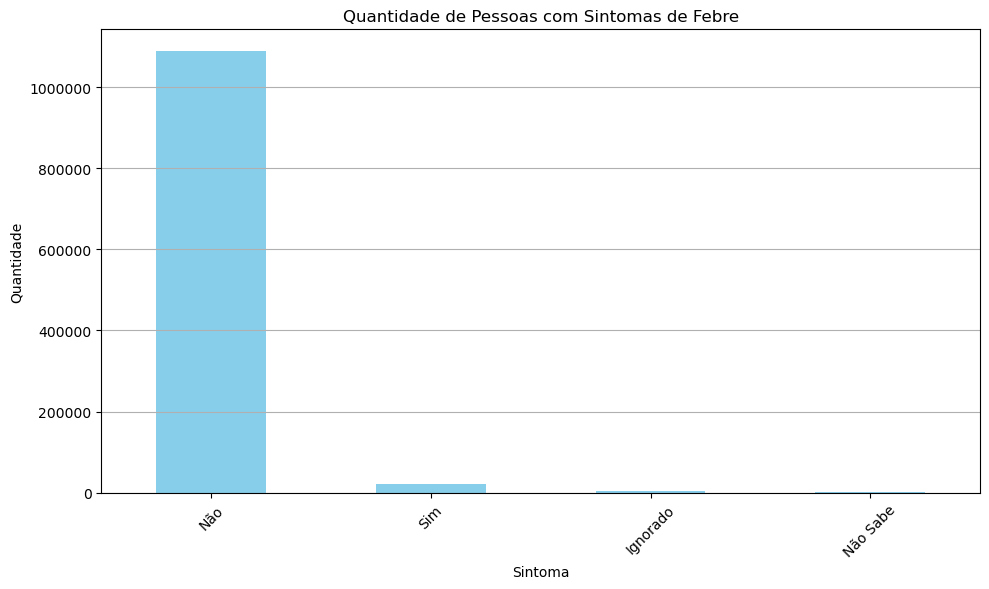

In [35]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
sintoma_febre.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Pessoas com Sintomas de Febre')
plt.xlabel('Sintoma')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

# Formatar o eixo y para mostrar apenas números inteiros
plt.gca().yaxis.get_major_locator().set_params(integer=True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.grid(axis='y')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Relevância do sintoma:
**Prevalência da Febre:** A grande maioria dos entrevistados (aproximadamente 97,6%) não apresentou febre, enquanto apenas cerca de 1,9% relatou ter febre. Isso sugere que, na amostra, a febre não foi um sintoma comum.

**Dados Ignorados e "Não Sabe":** Os dados ignorados (4.458) e aqueles que não sabem (1.247) representam um total de 5.705 pessoas. Isso indica que, mesmo entre os entrevistados, há uma quantidade considerável de incerteza ou falta de informação sobre sintomas.

### Na semana passada teve tosse?

In [9]:
sintoma_tosse = dados3['id_tosse_sm'].value_counts()
print(sintoma_tosse)

id_tosse_sm
Não         1079433
Sim           29554
Ignorado       4481
Não Sabe       1274
Name: count, dtype: int64


In [52]:
total_respostas = sintoma_febre.sum()

# Cálculo da porcentagem
porcentagem_tosse = (sintoma_tosse / total_respostas) * 100

# Arredondar para duas casas decimais
porcentagem_tosse = porcentagem_tosse.round(1)                                        

print(porcentagem_tosse)

id_tosse_sm
Não         96.8
Sim          2.7
Ignorado     0.4
Não Sabe     0.1
Name: count, dtype: float64


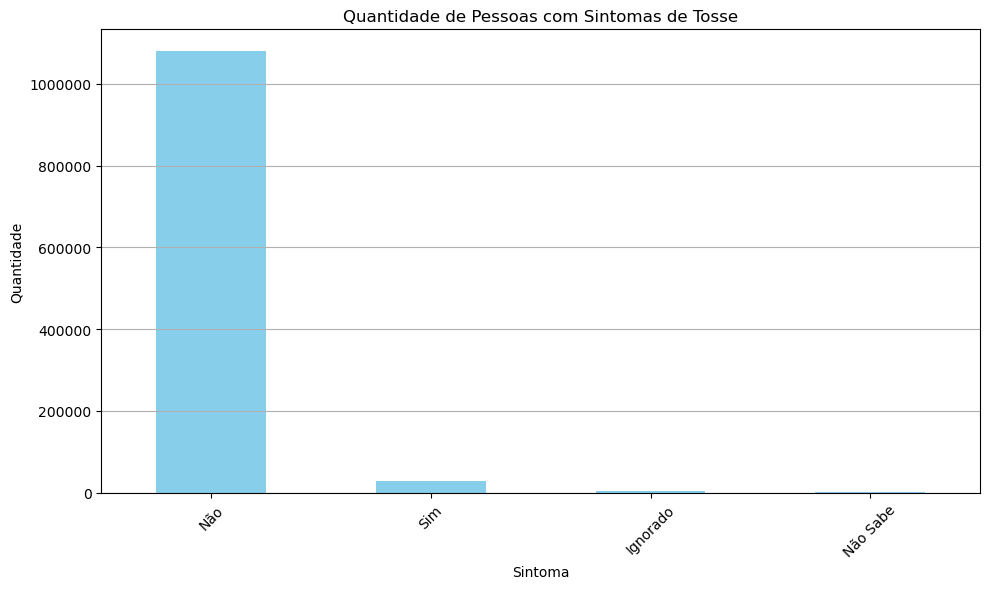

In [36]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
sintoma_tosse.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Pessoas com Sintomas de Tosse')
plt.xlabel('Sintoma')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

# Formatar o eixo y para mostrar apenas números inteiros
plt.gca().yaxis.get_major_locator().set_params(integer=True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.grid(axis='y')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Relevância do sintoma:
**Prevalência da Tosse:** Assim como na febre, a maioria dos entrevistados (aproximadamente 96,8%) não relatou tosse, enquanto cerca de 2,7% disseram ter tosse. Isso indica que a tosse também não foi um sintoma prevalente na amostra.

**Dados Ignorados e "Não Sabe":** Os dados ignorados (4.481) e os que não sabem (1.274) totalizam 5.755 pessoas. Isso mostra que ainda há uma quantidade significativa de incerteza ou falta de resposta, semelhante ao que observamos com a febre.

### Na semana passada teve dor de garganta?

In [10]:
sintoma_garganta = dados3['id_dor_garganta_sm'].value_counts()
print(sintoma_garganta)

id_dor_garganta_sm
Não         1086101
Sim           22769
Ignorado       4472
Não Sabe       1400
Name: count, dtype: int64


In [53]:
total_respostas = sintoma_garganta.sum()

# Cálculo da porcentagem
porcentagem_garganta = (sintoma_garganta / total_respostas) * 100

porcentagem_garganta = porcentagem_garganta.round(1)

print(porcentagem_garganta)

id_dor_garganta_sm
Não         97.4
Sim          2.0
Ignorado     0.4
Não Sabe     0.1
Name: count, dtype: float64


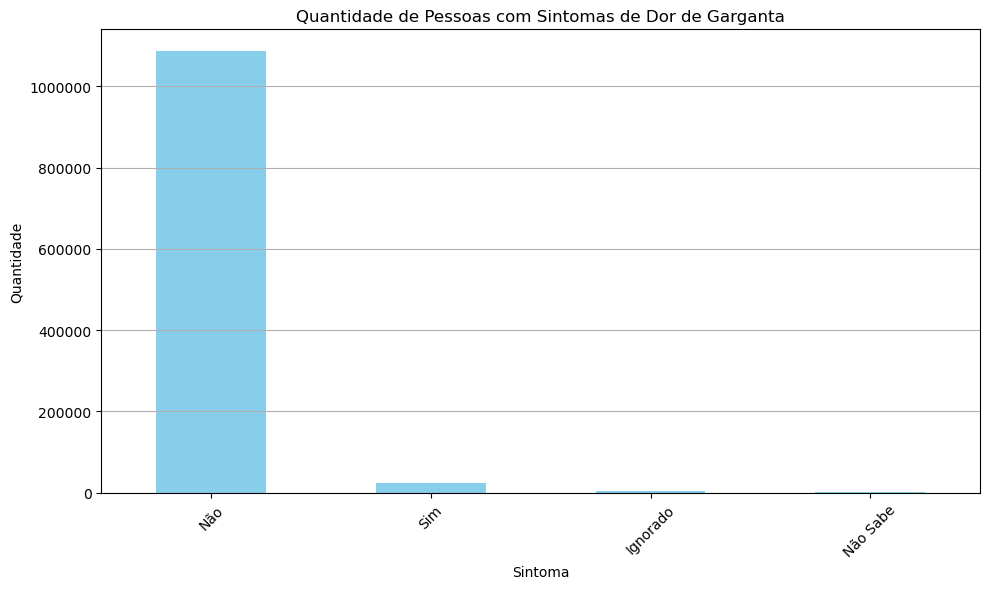

In [37]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
sintoma_garganta.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Pessoas com Sintomas de Dor de Garganta')
plt.xlabel('Sintoma')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

# Formatar o eixo y para mostrar apenas números inteiros
plt.gca().yaxis.get_major_locator().set_params(integer=True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.grid(axis='y')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Relevância do sintoma:
**Prevalência de Dor de Garganta:** A maioria dos entrevistados (aproximadamente 97,4%) não relatou dor de garganta, enquanto cerca de 2,0% afirmaram ter esse sintoma. Isso indica que a dor de garganta não foi um sintoma comum na amostra.

**Dados Ignorados e "Não Sabe":** Os dados ignorados (4.472) e os que não sabem (1.400) totalizam 5.872 pessoas. Esse número expressivo sugere uma quantidade considerável de incerteza entre os entrevistados.

### Na semana passada teve dificuldade para respirar?

In [11]:
sintoma_respirar= dados3['id_dif_respirar_sm'].value_counts()
print(sintoma_respirar)

id_dif_respirar_sm
Não         1097018
Sim           11858
Ignorado       4544
Não Sabe       1322
Name: count, dtype: int64


In [54]:
total_respostas = sintoma_respirar.sum()

# Cálculo da porcentagem
porcentagem_respirar = (sintoma_respirar / total_respostas) * 100

porcentagem_respirar = porcentagem_respirar.round(1)

print(porcentagem_respirar)

id_dif_respirar_sm
Não         98.4
Sim          1.1
Ignorado     0.4
Não Sabe     0.1
Name: count, dtype: float64


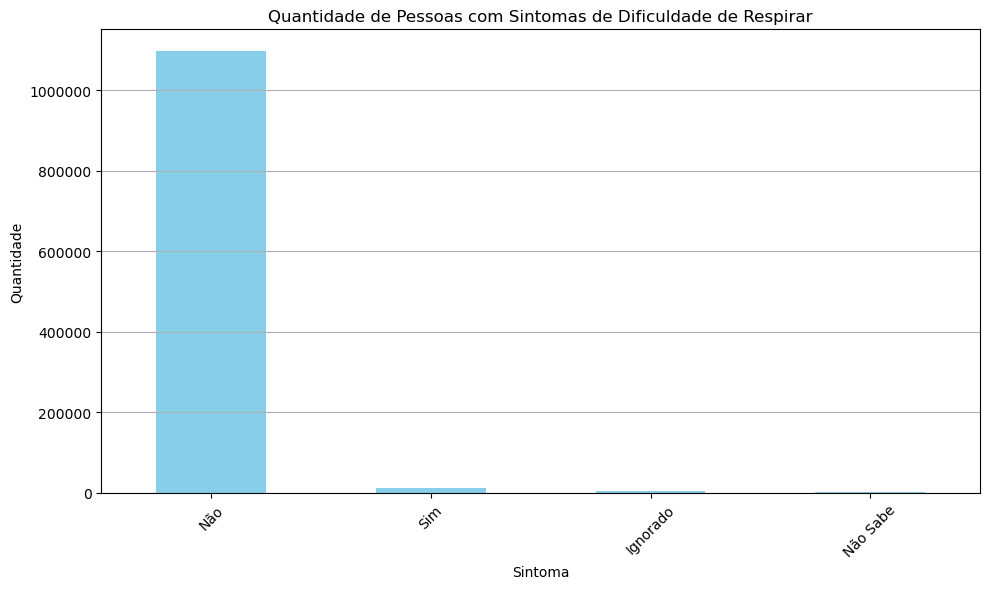

In [38]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
sintoma_respirar.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Pessoas com Sintomas de Dificuldade de Respirar')
plt.xlabel('Sintoma')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

# Formatar o eixo y para mostrar apenas números inteiros
plt.gca().yaxis.get_major_locator().set_params(integer=True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.grid(axis='y')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Relevância do sintoma:
**Prevalência da Dificuldade para Respirar:** A grande maioria dos entrevistados (aproximadamente 98,4%) não relatou dificuldade para respirar, enquanto apenas cerca de 1,1% afirmou ter esse sintoma. Isso sugere que a dificuldade para respirar não foi comum na amostra analisada.

**Dados Ignorados e "Não Sabe":** Os dados ignorados (4.544) e os que não sabem (1.322) totalizam 5.866 pessoas. Assim como nas análises anteriores, isso indica uma quantidade significativa de incerteza ou falta de resposta.

### Na semana passada teve dor de cabeça?

In [12]:
sintoma_cabeca= dados3['id_dor_cabeca_sm'].value_counts()
print(sintoma_cabeca)

id_dor_cabeca_sm
Não         1065819
Sim           42936
Ignorado       4489
Não Sabe       1498
Name: count, dtype: int64


In [55]:
total_respostas = sintoma_cabeca.sum()

# Cálculo da porcentagem
porcentagem_cabeca = (sintoma_cabeca / total_respostas) * 100

porcentagem_cabeca = porcentagem_cabeca.round(1)

print(porcentagem_cabeca)

id_dor_cabeca_sm
Não         95.6
Sim          3.9
Ignorado     0.4
Não Sabe     0.1
Name: count, dtype: float64


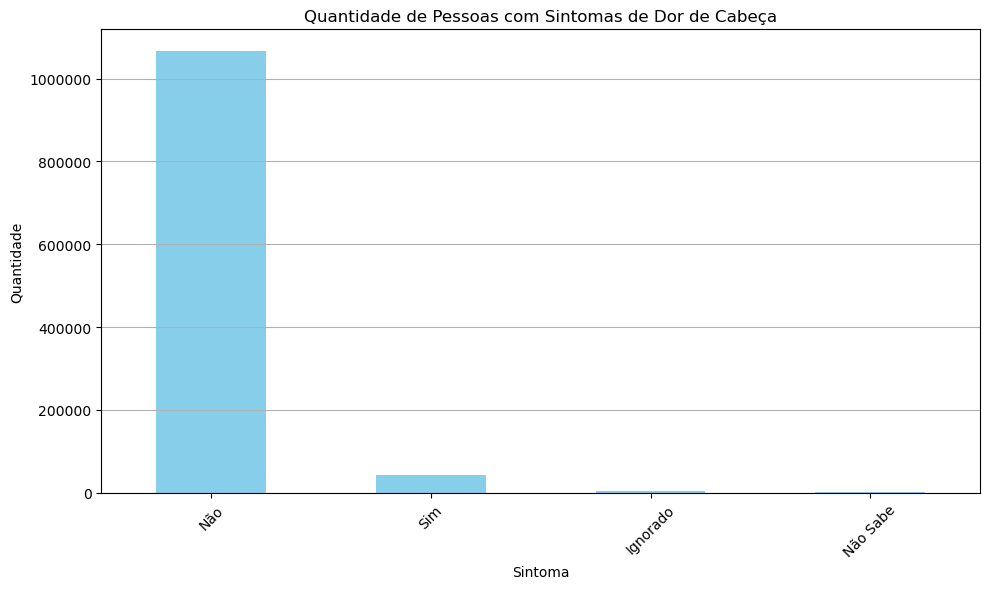

In [39]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
sintoma_cabeca.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Pessoas com Sintomas de Dor de Cabeça')
plt.xlabel('Sintoma')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

# Formatar o eixo y para mostrar apenas números inteiros
plt.gca().yaxis.get_major_locator().set_params(integer=True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.grid(axis='y')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Relevância do sintoma:
**Prevalência da Dor de Cabeça:** Aproximadamente 95,6% dos entrevistados não relataram dor de cabeça, enquanto cerca de 3,9% afirmaram ter esse sintoma. Isso indica que a dor de cabeça não foi o sintoma mais comum na amostra.

**Dados Ignorados e "Não Sabe":** Os dados ignorados (4.489) e os que não sabem (1.498) somam 5.987 pessoas. Esse número expressivo sugere que uma parte significativa da população entrevistada pode estar incerta sobre seus sintomas.

### Na semana passada teve dor no peito?

In [13]:
sintoma_dorpeito= dados3['id_dor_peito_sm'].value_counts()
print(sintoma_dorpeito)

id_dor_peito_sm
Não         1099122
Sim            9623
Ignorado       4544
Não Sabe       1453
Name: count, dtype: int64


In [56]:
total_respostas = sintoma_dorpeito.sum()

# Cálculo da porcentagem
porcentagem_peito = (sintoma_dorpeito / total_respostas) * 100

porcentagem_peito = porcentagem_peito.round(1)

print(porcentagem_peito)

id_dor_peito_sm
Não         98.6
Sim          0.9
Ignorado     0.4
Não Sabe     0.1
Name: count, dtype: float64


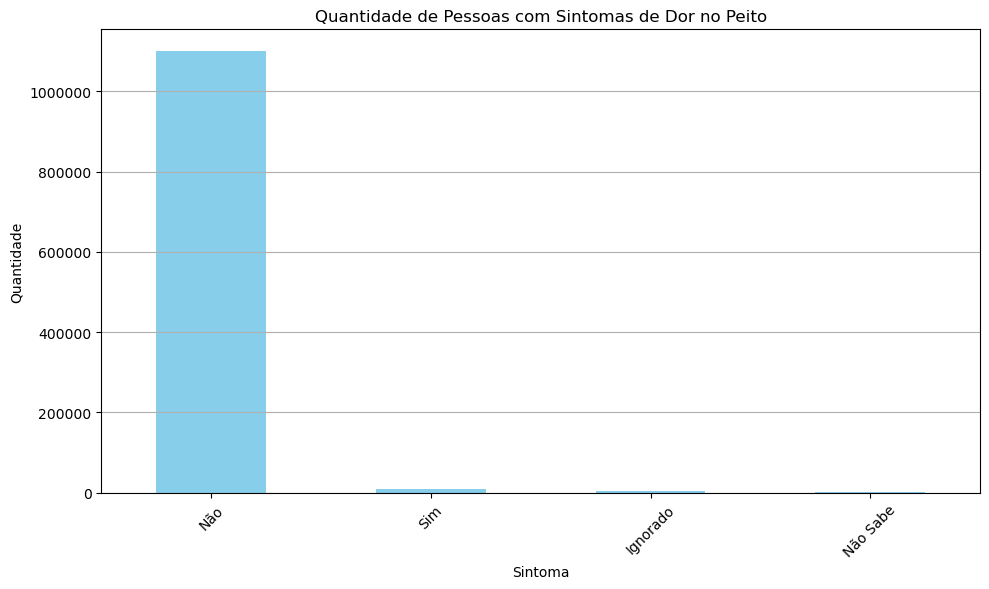

In [40]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
sintoma_dorpeito.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Pessoas com Sintomas de Dor no Peito')
plt.xlabel('Sintoma')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

# Formatar o eixo y para mostrar apenas números inteiros
plt.gca().yaxis.get_major_locator().set_params(integer=True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.grid(axis='y')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Relevância do sintoma:
**Prevalência da Dor no Peito:** A grande maioria dos entrevistados (aproximadamente 98,6%) não relatou dor no peito, enquanto apenas cerca de 0,9% afirmaram ter esse sintoma. Isso indica que a dor no peito não foi um sintoma comum na amostra.

**Dados Ignorados e "Não Sabe":** Os dados ignorados (4.544) e os que não sabem (1.453) totalizam 5.997 pessoas. Isso sugere uma quantidade considerável de incerteza ou falta de informação sobre os sintomas.

### Na semana passada teve náusea?

In [34]:
sintoma_nausea= dados3['id_nausea_sm'].value_counts()
print(sintoma_nausea)

id_nausea_sm
Não         1099511
Sim            9284
Ignorado       4586
Não Sabe       1361
Name: count, dtype: int64


In [57]:
total_respostas = sintoma_nausea.sum()

# Cálculo da porcentagem
porcentagem_nausea = (sintoma_nausea / total_respostas) * 100

porcentagem_nausea = porcentagem_nausea.round(1)

print(porcentagem_nausea)

id_nausea_sm
Não         98.6
Sim          0.8
Ignorado     0.4
Não Sabe     0.1
Name: count, dtype: float64


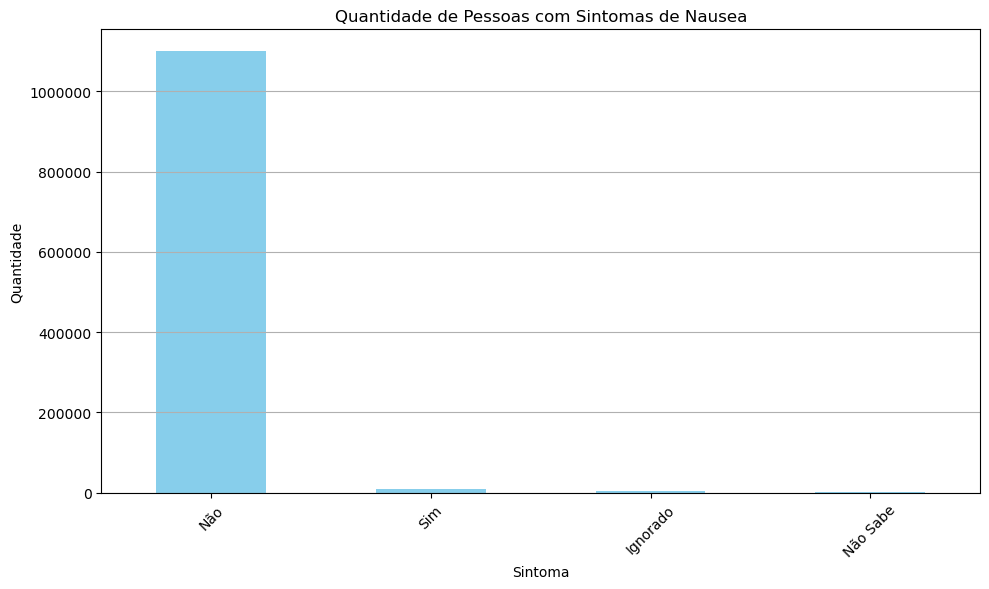

In [33]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
sintoma_nausea.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Pessoas com Sintomas de Nausea')
plt.xlabel('Sintoma')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

# Formatar o eixo y para mostrar apenas números inteiros
plt.gca().yaxis.get_major_locator().set_params(integer=True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.grid(axis='y')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Relevância do sintoma:
**Prevalência de Náusea:** A maioria dos entrevistados (aproximadamente 98,6%) não relatou náusea, enquanto cerca de 0,8% afirmaram ter esse sintoma. Isso sugere que a náusea não foi um sintoma comum na amostra.

**Dados Ignorados e "Não Sabe":** Os dados ignorados (4.586) e os que não sabem (1.361) totalizam 5.947 pessoas. Essa quantidade significativa de respostas ignoradas ou incertas indica que pode haver dificuldades na identificação dos sintomas.

### Na semana passada teve nariz entupido ou escorrendo?

In [32]:
sintoma_nariz_entupido= dados3['id_nariz_entupido_sm'].value_counts()
print(sintoma_nariz_entupido)

id_nariz_entupido_sm
Não         1076227
Sim           32592
Ignorado       4524
Não Sabe       1399
Name: count, dtype: int64


In [58]:
total_respostas = sintoma_nariz_entupido.sum()

# Cálculo da porcentagem
porcentagem_nariz_entupido = (sintoma_nariz_entupido / total_respostas) * 100

porcentagem_nariz_entupido = porcentagem_nariz_entupido.round(1)

print(porcentagem_nariz_entupido)

id_nariz_entupido_sm
Não         96.5
Sim          2.9
Ignorado     0.4
Não Sabe     0.1
Name: count, dtype: float64


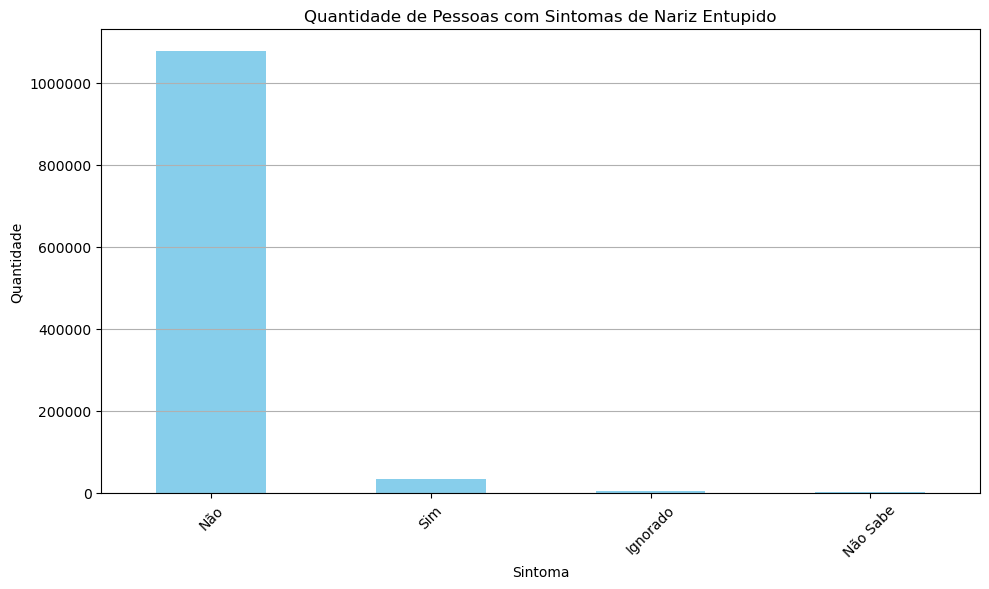

In [31]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
sintoma_nariz_entupido.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Pessoas com Sintomas de Nariz Entupido')
plt.xlabel('Sintoma')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

# Formatar o eixo y para mostrar apenas números inteiros
plt.gca().yaxis.get_major_locator().set_params(integer=True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.grid(axis='y')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Relevância do sintoma:
**Prevalência de Sintomas Nasais:** Aproximadamente 96,5% dos entrevistados não relataram nariz entupido ou escorrendo, enquanto cerca de 2,9% afirmaram ter esse sintoma. Isso sugere que, embora não seja o sintoma mais comum, há uma porcentagem relevante que experimentou problemas nasais.

**Dados Ignorados e "Não Sabe":** Os dados ignorados (4.524) e os que não sabem (1.399) totalizam 5.923 pessoas. Isso mostra que uma parte considerável dos entrevistados pode estar incerta sobre seus sintomas.

### Na semana passada teve fadiga?

In [16]:
sintoma_fadiga= dados3['id_fadiga_sm'].value_counts()
print(sintoma_fadiga)

id_fadiga_sm
Não         1093677
Sim           15067
Ignorado       4552
Não Sabe       1446
Name: count, dtype: int64


In [59]:
total_respostas = sintoma_fadiga.sum()

# Cálculo da porcentagem
porcentagem_fadiga = (sintoma_fadiga / total_respostas) * 100

porcentagem_fadiga = porcentagem_fadiga.round(1)

print(porcentagem_fadiga)

id_fadiga_sm
Não         98.1
Sim          1.4
Ignorado     0.4
Não Sabe     0.1
Name: count, dtype: float64


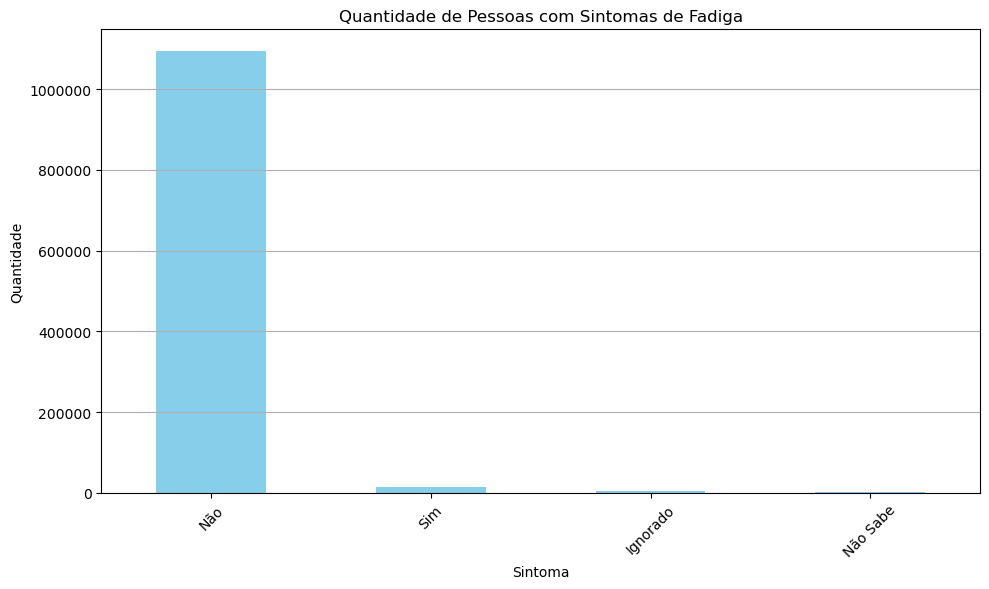

In [30]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
sintoma_fadiga.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Pessoas com Sintomas de Fadiga')
plt.xlabel('Sintoma')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

# Formatar o eixo y para mostrar apenas números inteiros
plt.gca().yaxis.get_major_locator().set_params(integer=True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.grid(axis='y')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Relevância do sintoma:
**Prevalência de Fadiga:** A maioria dos entrevistados (aproximadamente 98,1%) não relatou fadiga, enquanto cerca de 1,4% afirmaram ter esse sintoma. Isso sugere que a fadiga não foi um sintoma amplamente relatado na amostra.

**Dados Ignorados e "Não Sabe":** Os dados ignorados (4.552) e os que não sabem (1.446) totalizam 5.998 pessoas. Esse número significativo de respostas não informadas indica incerteza entre os entrevistados.

### Na semana passada teve dor nos olhos?

In [29]:
sintoma_dor_olhos = dados3['id_dor_olhos_sm'].value_counts()
print(sintoma_dor_olhos)

id_dor_olhos_sm
Não         1095551
Sim           11206
Ignorado       6533
Não Sabe       1452
Name: count, dtype: int64


In [60]:
total_respostas = sintoma_dor_olhos.sum()

# Cálculo da porcentagem
porcentagem_dor_olhos = (sintoma_dor_olhos / total_respostas) * 100

porcentagem_dor_olhos = porcentagem_dor_olhos.round(1)

print(porcentagem_dor_olhos)

id_dor_olhos_sm
Não         98.3
Sim          1.0
Ignorado     0.6
Não Sabe     0.1
Name: count, dtype: float64


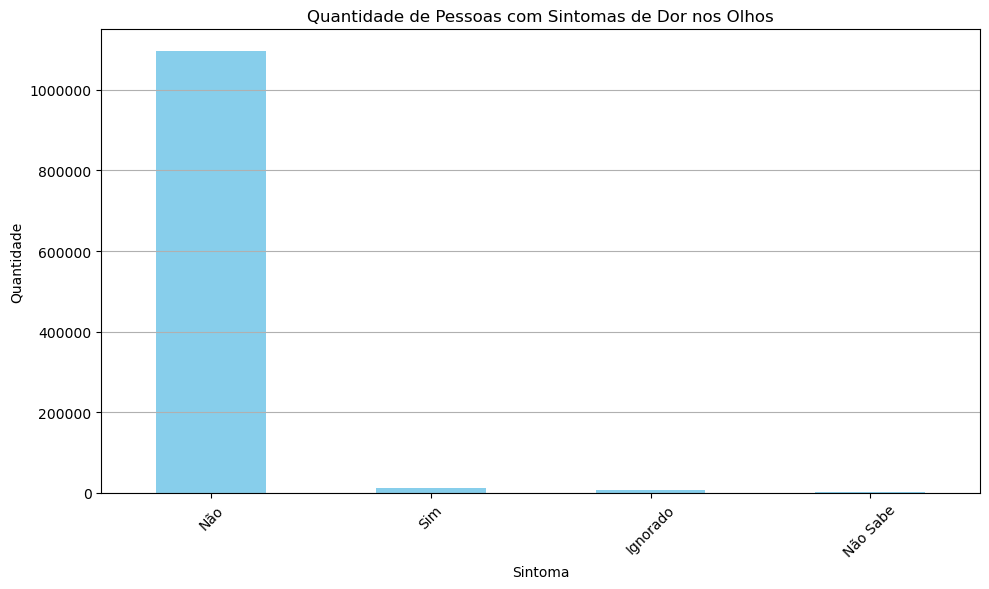

In [25]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
sintoma_dor_olhos.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Pessoas com Sintomas de Dor nos Olhos')
plt.xlabel('Sintoma')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

# Formatar o eixo y para mostrar apenas números inteiros
plt.gca().yaxis.get_major_locator().set_params(integer=True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.grid(axis='y')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


### Relevância do sintoma:
**Prevalência de Dor nos Olhos:** A maioria dos entrevistados (aproximadamente 98,3%) não relatou dor nos olhos, enquanto cerca de 1,0% afirmaram ter esse sintoma. Isso indica que a dor nos olhos não foi um sintoma comum na amostra.

**Dados Ignorados e "Não Sabe":** Os dados ignorados (6.533) e os que não sabem (1.452) somam 7.985 pessoas. Esse número indica uma quantidade considerável de incerteza ou falta de informação sobre esse sintoma.

### Na semana passada teve perda de cheiro ou sabor?

In [18]:
sintoma_perda_cheiro_sabor= dados3['id_perda_cheiro_sabor_sm'].value_counts()
print(sintoma_perda_cheiro_sabor)

id_perda_cheiro_sabor_sm
Não         1092954
Sim           13946
Ignorado       6372
Não Sabe       1470
Name: count, dtype: int64


In [61]:
total_respostas = sintoma_perda_cheiro_sabor.sum()

# Cálculo da porcentagem
porcentagem_perda_cheiro_sabor = (sintoma_perda_cheiro_sabor / total_respostas) * 100

porcentagem_perda_cheiro_sabor = porcentagem_perda_cheiro_sabor.round(1)

print(porcentagem_perda_cheiro_sabor)

id_perda_cheiro_sabor_sm
Não         98.0
Sim          1.3
Ignorado     0.6
Não Sabe     0.1
Name: count, dtype: float64


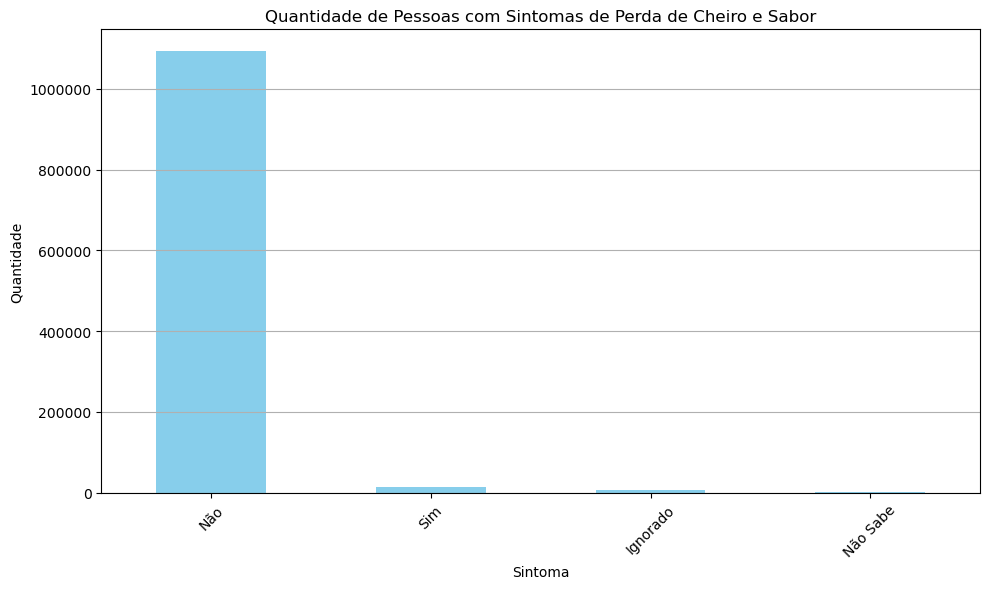

In [28]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
sintoma_perda_cheiro_sabor.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Pessoas com Sintomas de Perda de Cheiro e Sabor')
plt.xlabel('Sintoma')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

# Formatar o eixo y para mostrar apenas números inteiros
plt.gca().yaxis.get_major_locator().set_params(integer=True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.grid(axis='y')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Relevância do sintoma:
**Prevalência de Perda de Cheiro ou Sabor:** A maioria dos entrevistados (aproximadamente 98,0%) não relatou perda de cheiro ou sabor, enquanto cerca de 1,3% afirmaram ter esse sintoma. Isso sugere que, apesar de ser um sintoma associado à COVID-19, sua ocorrência nesta amostra foi relativamente baixa.

**Dados Ignorados e "Não Sabe":** Os dados ignorados (6.372) e os que não sabem (1.470) totalizam 7.842 pessoas. Isso indica uma quantidade significativa de incerteza ou falta de informação sobre esse sintoma.

### Na semana passada teve dor muscular?

In [19]:
sintoma_dor_muscular= dados3['id_dor_muscular_sm'].value_counts()
print(sintoma_dor_muscular)

id_dor_muscular_sm
Não         1081564
Sim           25318
Ignorado       6396
Não Sabe       1464
Name: count, dtype: int64


In [62]:
total_respostas = sintoma_dor_muscular.sum()

# Cálculo da porcentagem
porcentagem_dor_muscular = (sintoma_dor_muscular / total_respostas) * 100

porcentagem_dor_muscular = porcentagem_dor_muscular.round(1)

print(porcentagem_dor_muscular)

id_dor_muscular_sm
Não         97.0
Sim          2.3
Ignorado     0.6
Não Sabe     0.1
Name: count, dtype: float64


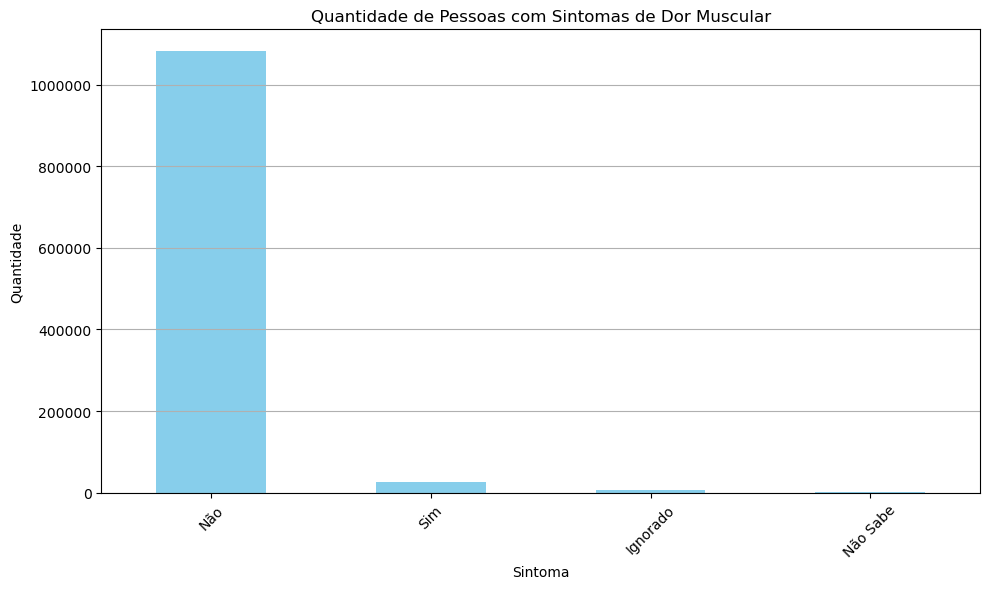

In [27]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
sintoma_dor_muscular.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Pessoas com Sintomas de Dor Muscular')
plt.xlabel('Sintoma')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

# Formatar o eixo y para mostrar apenas números inteiros
plt.gca().yaxis.get_major_locator().set_params(integer=True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.grid(axis='y')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Relevância do sintoma:
**Prevalência de Dor Muscular:** A maioria dos entrevistados (aproximadamente 97,0%) não relatou dor muscular, enquanto cerca de 2,3% afirmaram ter esse sintoma. Isso sugere que a dor muscular não foi um sintoma comum na amostra.

**Dados Ignorados e "Não Sabe":** Os dados ignorados (6.396) e os que não sabem (1.464) totalizam 7.860 pessoas. Essa quantidade significativa de respostas não informadas indica incerteza sobre os sintomas.

### Conclusão dos Sintomas:

Com base nas análises dos sintomas relatados na semana passada, observamos que a maioria dos entrevistados não apresentou sintomas clássicos da COVID-19, como febre, tosse, dificuldade para respirar e dor de garganta, com prevalências geralmente abaixo de 3%. Embora sintomas como dor muscular e perda de cheiro ou sabor tenham sido relatados, sua frequência também foi baixa.

Esses dados sugerem que muitos casos podem ser assintomáticos ou manifestar sintomas não típicos, o que destaca a importância de uma abordagem abrangente na vigilância e testagem para a COVID-19. A considerável quantidade de respostas ignoradas ou de pessoas incertas sobre seus sintomas indica que a comunicação e a conscientização sobre a identificação de sinais da doença ainda são essenciais.

### Proporção de Sintomas por Mês:

In [6]:
colunas_sintomas = ['id_febre_sm', 'id_tosse_sm', 'id_dor_garganta_sm', 'id_dif_respirar_sm', 
                    'id_dor_cabeca_sm', 'id_dor_peito_sm', 'id_nausea_sm', 'id_nariz_entupido_sm', 
                    'id_fadiga_sm', 'id_dor_olhos_sm', 'id_perda_cheiro_sabor_sm', 'id_dor_muscular_sm']



In [19]:
# Porcentagem de sintomas por semana e mês
sintomas_semana = dados3.groupby(['ano', 'mes'])[colunas_sintomas].apply(lambda x: (x == 'Sim').sum() / x.count() * 100)
print(sintomas_semana)


          id_febre_sm  id_tosse_sm  id_dor_garganta_sm  id_dif_respirar_sm  \
ano  mes                                                                     
2020 5       2.418510     3.463725            2.574820            1.454599   
     6       1.716631     2.353450            1.840690            0.979621   
     7       1.518094     2.207900            1.758875            0.791845   

          id_dor_cabeca_sm  id_dor_peito_sm  id_nausea_sm  \
ano  mes                                                    
2020 5            5.094387         1.196086      1.102185   
     6            3.563879         0.792876      0.756419   
     7            3.007294         0.630457      0.663776   

          id_nariz_entupido_sm  id_fadiga_sm  id_dor_olhos_sm  \
ano  mes                                                        
2020 5                3.842476      1.704236         1.387895   
     6                2.638288      1.198363         0.948934   
     7                2.371631      1.18308

### Conclusão:
O resultado apresenta a prevalência de sintomas em percentagem relatados por mês (maio, junho e julho de 2020) durante o ano de 2020. Com base nesses dados, podemos tirar as seguintes conclusões:

* Há uma tendência de redução na prevalência da maioria dos sintomas de maio para julho de 2020.
Isso pode sugerir que o pico de casos ocorreu em maio, com um declínio nos meses subsequentes.
* Dor de cabeça foi o sintoma mais relatado em todos os meses, com uma prevalência de 5,09% em maio, reduzindo para 3,01% em julho.
Outros sintomas comuns incluem tosse (3,46% em maio) e dor muscular (3,04% em maio), também mostrando uma redução ao longo do tempo.
* Sintomas como dor no peito, náusea, fadiga, e perda de cheiro/sabor foram relatados com menor frequência.
A dor no peito foi consistentemente um dos sintomas menos comuns, variando de 1,19% em maio a 0,63% em julho.

A análise revela que a prevalência de sintomas relacionados à COVID-19 atingiu um pico em maio de 2020 e diminuiu gradualmente nos meses seguintes. Dor de cabeça, tosse, e dor muscular foram os sintomas mais comuns, enquanto a dificuldade respiratória e a perda de cheiro e sabor diminuíram significativamente com o tempo, sugerindo uma possível redução na transmissão ou efetividade das medidas de controle da pandemia ao longo desses meses.

### Distribuição de Sintomas por Faixa Etária:

In [7]:
dados3['idade_morador'] = pd.to_numeric(dados3['idade_morador'], errors='coerce')
dados3 = dados3.dropna(subset=['idade_morador'])

# Criando as faixas etárias
bins = [0, 18, 35, 60, 120]
labels = ['0-18', '19-35', '36-60', '60+']
dados3['faixa_etaria'] = pd.cut(dados3['idade_morador'], bins=bins, labels=labels)

# Agrupando por faixa etária e calculando a porcentagem de sintomas
sintomas_faixa_etaria = dados3.groupby('faixa_etaria')[colunas_sintomas].apply(lambda x: (x == 'Sim').sum() / x.count() * 100)

print(sintomas_faixa_etaria)

              id_febre_sm  id_tosse_sm  id_dor_garganta_sm  \
faixa_etaria                                                 
0-18             1.508198     1.667786            1.317793   
19-35            2.225211     2.733075            2.571364   
36-60            2.126137     3.077229            2.456255   
60+              1.312844     3.170175            1.528839   

              id_dif_respirar_sm  id_dor_cabeca_sm  id_dor_peito_sm  \
faixa_etaria                                                          
0-18                    0.456385          1.501227         0.298631   
19-35                   1.248980          5.062617         1.000823   
36-60                   1.336488          5.119933         1.182795   
60+                     1.167160          3.048115         0.866229   

              id_nausea_sm  id_nariz_entupido_sm  id_fadiga_sm  \
faixa_etaria                                                     
0-18              0.439142              2.211118      0.449414   
19

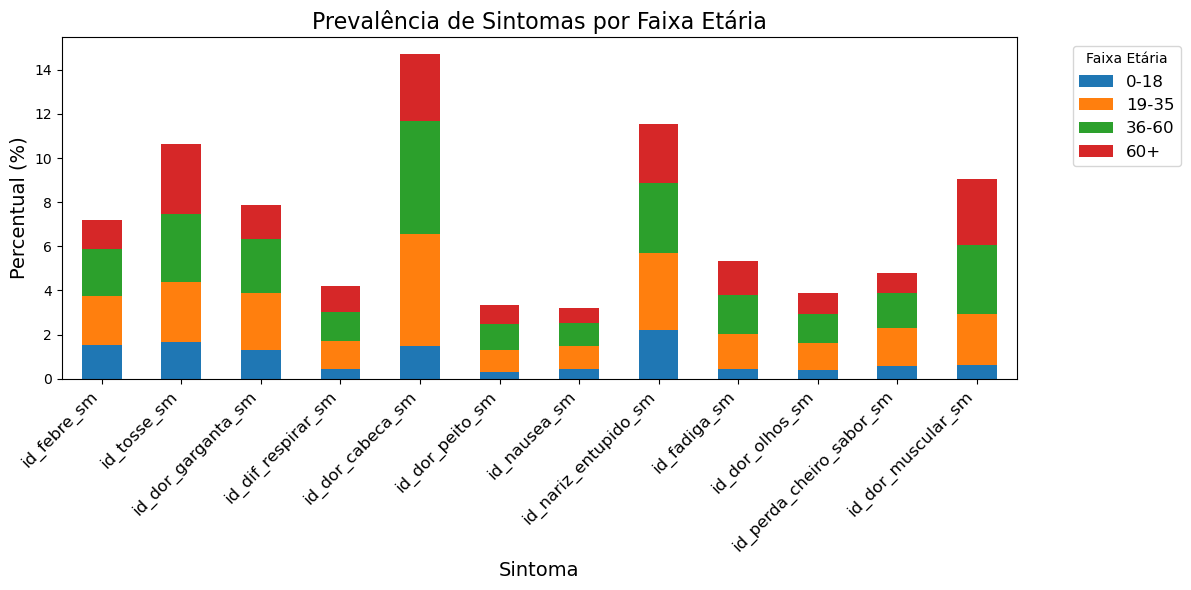

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para sintomas por faixa etária
sintomas_faixa_etaria.T.plot(kind='bar', stacked=True, figsize=(12, 6))

# Título e rótulos
plt.title('Prevalência de Sintomas por Faixa Etária', fontsize=16)
plt.ylabel('Percentual (%)', fontsize=14)
plt.xlabel('Sintoma', fontsize=14)

# Adicionar legenda fora do gráfico
plt.legend(title='Faixa Etária', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45, ha='right', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()



### A análise dos sintomas por faixa etária revela os seguintes padrões e tendências:

* **Incidência Geral de Sintomas:**

As faixas etárias entre 19-35 e 36-60 anos apresentam a maior porcentagem de sintomas relatados, com destaque para a faixa 36-60, que lidera em diversos sintomas. Isso pode indicar que adultos de meia-idade são mais propensos a experimentar sintomas mais intensos ou a relatá-los com mais frequência.

* **Sintomas Respiratórios:**
- A tosse é mais frequente em todas as faixas etárias, especialmente em pessoas de 36-60 anos (3.08%) e em idosos (60+) (3.17%).
- A febre é mais comum na faixa de 19-35 anos (2.22%) e 36-60 anos (2.12%), enquanto a dificuldade para respirar é ligeiramente mais alta nas faixas de 36-60 anos e 60+.

* **Dor de Cabeça:** É mais comum em adultos de 36-60 anos (5.11%) e em pessoas de 19-35 anos (5.06%).
Fadiga: A fadiga também é maior nas faixas de 36-60 anos (1.78%) e 19-35 anos (1.56%).

* **Dor Muscular:** É mais relatada na faixa de 36-60 anos (3.13%), seguida pelos idosos (60+) (2.96%).

* **Perda de Olfato/Paladar:** É mais presente na faixa de 19-35 anos (1.72%) e diminui com a idade, sendo menos comum em crianças/adolescentes (0-18).


* **Conclusão Geral:**
Os adultos jovens (19-35 anos) e os adultos de meia-idade (36-60 anos) são os grupos que apresentam maior incidência de sintomas da doença, incluindo sintomas respiratórios, dores de cabeça, dores musculares, e perda de olfato/paladar.

A faixa etária mais jovem (0-18 anos) e os idosos (60+) tendem a apresentar uma menor porcentagem de sintomas ou menos intensidade, indicando que os sintomas podem ser mais leves ou menos frequentes nesses grupos.

### Sintomas por Região Geográfica:

In [33]:
sintomas_estado = dados3.groupby('sigla_uf')[colunas_sintomas].apply(lambda x: (x == 'Sim').sum() / x.count() * 100)
print(sintomas_estado.T)

sigla_uf                        AC        AL        AM        AP        BA  \
id_febre_sm               4.233713  2.733433  4.915103  7.470097  1.536514   
id_tosse_sm               4.108733  2.914322  5.197498  7.120289  2.006484   
id_dor_garganta_sm        4.009790  2.027105  4.418231  5.800045  1.371545   
id_dif_respirar_sm        2.322554  1.073849  2.502234  4.028436  0.803744   
id_dor_cabeca_sm          6.561475  3.947973  6.380697  9.320695  3.857590   
id_dor_peito_sm           2.228818  0.732170  2.698838  4.051004  0.577392   
id_nausea_sm              1.822632  0.961870  2.066130  3.441661  0.669467   
id_nariz_entupido_sm      3.515076  2.963133  3.899911  5.642067  2.539756   
id_fadiga_sm              2.874551  1.449983  3.195710  5.326111  0.824845   
id_dor_olhos_sm           2.359006  0.961870  2.480786  3.644775  0.909248   
id_perda_cheiro_sabor_sm  2.739155  1.897898  4.010724  5.450237  0.679059   
id_dor_muscular_sm        3.483831  2.127598  4.071492  5.912886

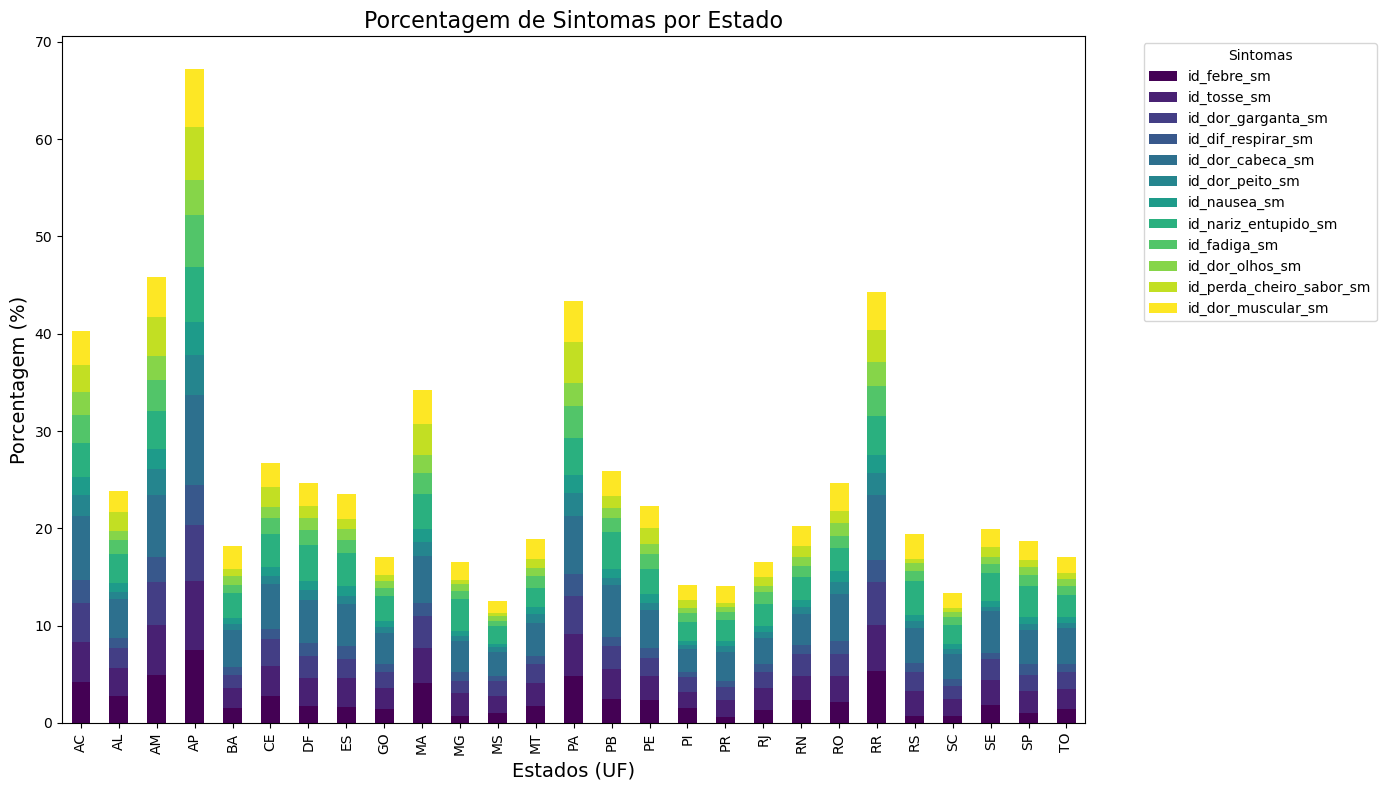

In [36]:
import matplotlib.pyplot as plt

# Criando o gráfico de barras para cada sintoma por estado
sintomas_estado.plot(kind='bar', figsize=(14, 8), stacked=True, colormap='viridis')

# Configurando o título e os rótulos dos eixos
plt.title('Porcentagem de Sintomas por Estado', fontsize=16)
plt.xlabel('Estados (UF)', fontsize=14)
plt.ylabel('Porcentagem (%)', fontsize=14)
plt.legend(title='Sintomas', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

### Analisando o gráfico de barras empilhadas, podemos fazer as seguintes observações:

* **Variedade de sintomas por estado:**

Estados como Amapá (AP) e Amazonas (AM) têm uma porcentagem significativamente maior de sintomas em relação a outros estados. Isso indica que esses estados registraram uma prevalência maior de sintomas entre seus habitantes.

Em contraste, estados como Espírito Santo (ES), Goiás (GO), e São Paulo (SP) apresentam porcentagens menores, sugerindo uma menor prevalência ou relato de sintomas nesses locais.

* **Sintomas mais comuns:**

O sintoma "id_dor_cabeca_sm" (dor de cabeça), que aparece em uma cor azul-clara, parece ser bastante prevalente em vários estados.

A perda de cheiro/sabor ("id_perda_cheiro_sabor_sm") e dores musculares ("id_dor_muscular_sm"), que aparecem nas cores verde e amarelo respectivamente, também são sintomas frequentes, especialmente em estados como Amapá (AP) e Roraima (RR).

* **Variação por região:**

Os estados da região Norte, como AP, AM, e RR, têm uma prevalência maior de sintomas em comparação com os estados do Sudeste e Centro-Oeste.
Isso pode sugerir uma maior incidência de doenças que causam esses sintomas ou diferenças na forma como os sintomas foram relatados em diferentes regiões do país.


* **Conclusão:**
O gráfico evidencia variações significativas na prevalência de sintomas entre os estados do Brasil. Os estados da região Norte tendem a apresentar maiores taxas de sintomas, enquanto os estados do Sul e Sudeste apresentam taxas mais baixas. 

### Análise de Coocorrência de Sintomas:

In [40]:
import numpy as np

# Substituindo "Sim" e "Não" por 1 e 0, e valores não numéricos por NaN
dados_sintomas = dados3[colunas_sintomas].replace({'Sim': 1, 'Não': 0, 'Ignorado': np.nan, 'Não Sabe': np.nan})

# Matriz de correlação
correlacao_sintomas = dados_sintomas.corr()
print(correlacao_sintomas)

                          id_febre_sm  id_tosse_sm  id_dor_garganta_sm  \
id_febre_sm                  1.000000     0.428832            0.434253   
id_tosse_sm                  0.428832     1.000000            0.446271   
id_dor_garganta_sm           0.434253     0.446271            1.000000   
id_dif_respirar_sm           0.338377     0.356825            0.329248   
id_dor_cabeca_sm             0.415594     0.366774            0.387411   
id_dor_peito_sm              0.339946     0.336067            0.336766   
id_nausea_sm                 0.344701     0.297356            0.316498   
id_nariz_entupido_sm         0.300639     0.404195            0.361950   
id_fadiga_sm                 0.404259     0.375422            0.372751   
id_dor_olhos_sm              0.370468     0.315589            0.342532   
id_perda_cheiro_sabor_sm     0.477129     0.367812            0.362806   
id_dor_muscular_sm           0.421646     0.356241            0.354433   

                          id_dif_resp

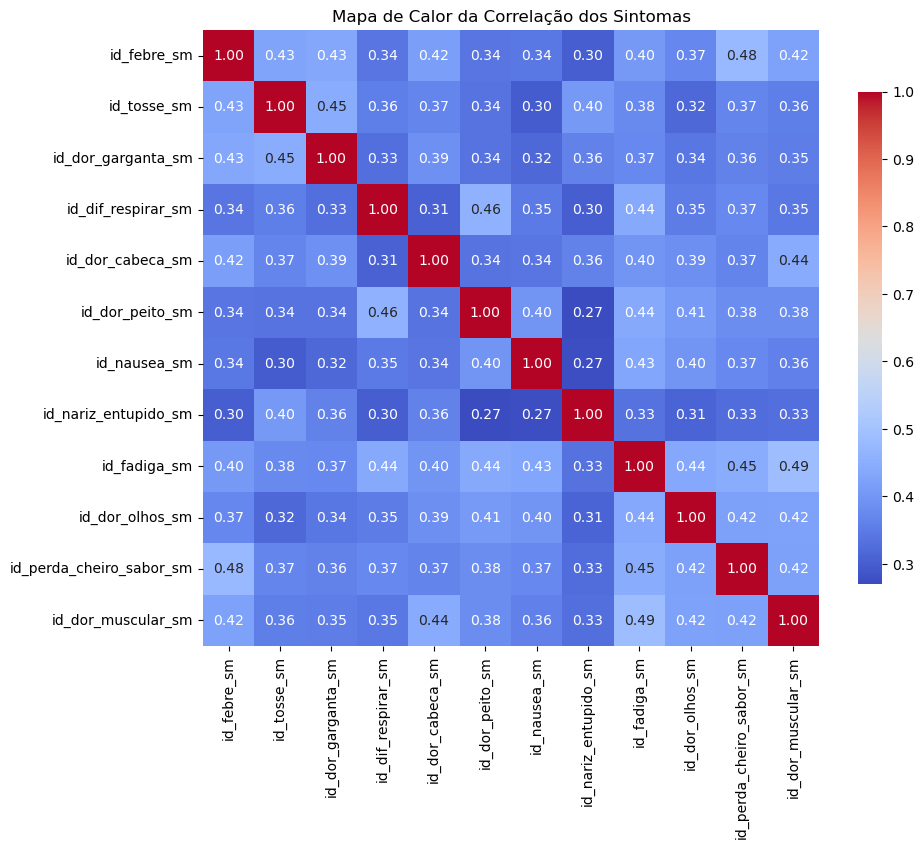

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao_sintomas, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor da Correlação dos Sintomas')
plt.show()

### Conclusão sobre a Análise de Coocorrência de Sintomas:
A análise de coocorrência dos sintomas, conforme ilustrado no mapa de calor, revela padrões importantes que podem ajudar a entender melhor a interação entre diferentes sintomas em um determinado contexto, como em doenças respiratórias ou infecciosas.

* **Sintomas com Alta Coocorrência:**

Fadiga tem uma forte correlação com vários outros sintomas, como dor muscular (0.49), dor nos olhos (0.45) e dor de cabeça (0.44). Isso sugere que a fadiga é um sintoma central que tende a acompanhar outros desconfortos físicos em muitos casos.

A dor muscular e fadiga são altamente correlacionadas, indicando que, em muitos pacientes, o cansaço extremo está relacionado a dores musculares, o que é típico em doenças infecciosas ou estados febris.

* **Sintomas com Correlação Moderada:**

A febre tem uma correlação moderada com a perda de cheiro e sabor (0.48), sugerindo que, em alguns casos, a febre está associada a essa perda sensorial, um padrão comum em infecções virais, como a COVID-19.

Dor de cabeça também mostra correlação moderada com diversos sintomas, o que pode indicar que ela frequentemente coexiste com outros sintomas em quadros clínicos mais amplos.

* **Sintomas com Baixa Coocorrência:**

A náusea tem uma correlação baixa com a maioria dos sintomas, como dor de garganta (0.30) e nariz entupido (0.27), sugerindo que esses sintomas aparecem de maneira mais isolada, não sendo comumente associados em um mesmo quadro clínico.

Nariz entupido também tem correlações baixas com outros sintomas, exceto com tosse (0.40), o que pode indicar que, embora seja um sintoma desconfortável, não tem tanta relevância em quadros que incluem sintomas mais severos.


### Análise de Sintomas por Condição Socioeconômica

In [44]:
# Porcentagem de sintomas por nível de escolaridade
sintomas_escolaridade = dados3.groupby('id_escolaridade')[colunas_sintomas].apply(lambda x: (x == 'Sim').sum() / x.count() * 100)
print(sintomas_escolaridade)


                 id_febre_sm  id_tosse_sm  id_dor_garganta_sm  \
id_escolaridade                                                 
Fund. Compl.        1.747474     2.869127            1.951167   
Fund. Incompl.      1.663239     2.445924            1.628650   
Médio Compl.        2.168348     2.916783            2.517246   
Médio Incompl.      2.064652     2.586067            2.187843   
Pós, Mest, Dout     1.579264     2.854007            2.967317   
S/ Inst             1.809281     2.295457            1.215440   
Sup Compl.          1.757370     2.772322            2.471595   
Sup. Incompl.       2.152036     3.067210            2.962275   

                 id_dif_respirar_sm  id_dor_cabeca_sm  id_dor_peito_sm  \
id_escolaridade                                                          
Fund. Compl.               1.194018          3.804508         0.987644   
Fund. Incompl.             0.874923          3.045205         0.724232   
Médio Compl.               1.304278          4.864229

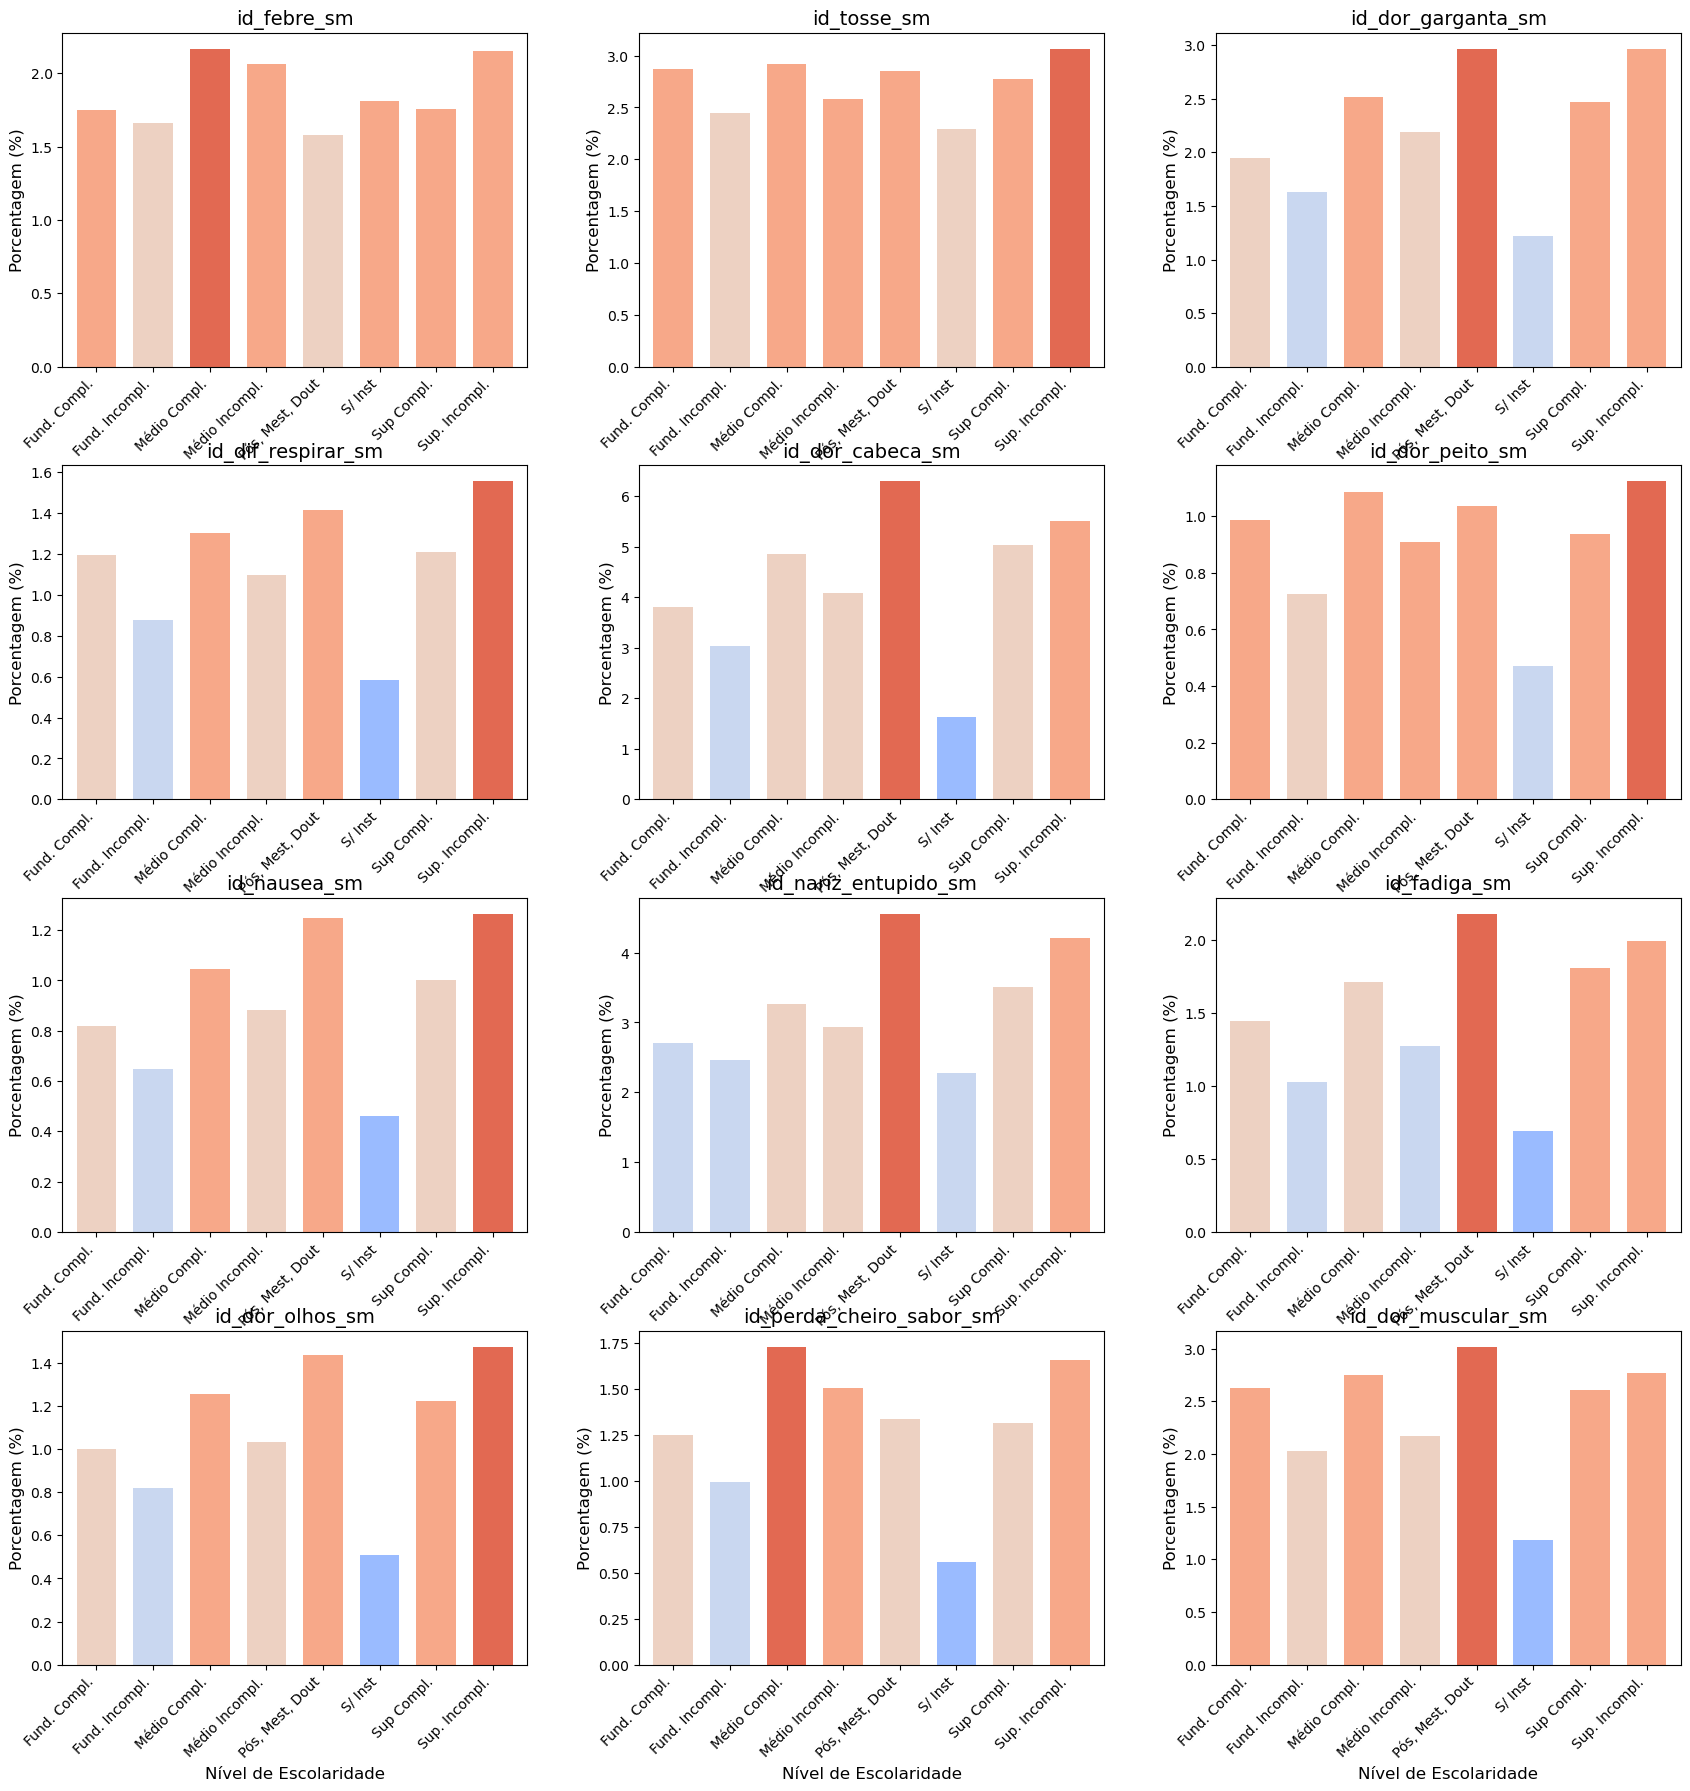

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir o número de linhas e colunas para os subplots
n_sintomas = len(colunas_sintomas)  # Número de sintomas
n_linhas = (n_sintomas + 2) // 3  # Determina o número de linhas para ter 3 gráficos por linha

# Criar os subplots
fig, axs = plt.subplots(n_linhas, 3, figsize=(18, 18))  # 3 colunas por linha

# Ajustar o layout para que os gráficos não se sobreponham
fig.tight_layout(pad=5.0)

# Definir uma paleta de cores que varia em intensidade
colors = sns.color_palette("coolwarm", as_cmap=False)

# Loop pelos sintomas e suas colunas
for i, sintoma in enumerate(colunas_sintomas):
    # Selecionar o eixo correto para o subplot atual
    ax = axs[i // 3, i % 3]  # Índice da linha e coluna para o subplot

    # Pegar os dados do sintoma atual
    dados = sintomas_escolaridade[sintoma]
    
    # Definir uma cor mais intensa para valores mais altos
    colors_by_value = [colors[int(v / dados.max() * (len(colors) - 1))] for v in dados]

    # Criar o gráfico de barras para o sintoma atual
    dados.plot(kind='bar', ax=ax, color=colors_by_value, width=0.7)
    
    # Ajustes de rótulos e títulos
    ax.set_title(sintoma, fontsize=14)
    ax.set_ylabel('Porcentagem (%)', fontsize=12)
    ax.set_xlabel('Nível de Escolaridade', fontsize=12)
    ax.set_xticklabels(dados.index, rotation=45, ha='right')

# Exibir os gráficos
plt.show()


### Conclusão referente aos sintomas por nível de escolaridade:

A análise dos dados mostra que há uma relação entre o nível de escolaridade e a percepção de certos sintomas.

* Dor de cabeça é mais prevalente entre indivíduos com níveis de escolaridade mais altos, como pós-graduação, mestrado e doutorado. Isso pode sugerir que pessoas mais educadas têm maior consciência e relatam mais sintomas, possivelmente devido a pressões acadêmicas e profissionais.

*Fadiga e perda de cheiro/sabor também são reportados com mais frequência entre aqueles com níveis educacionais mais altos. Isso pode indicar que esses indivíduos têm uma maior capacidade de reconhecer e relatar sintomas relacionados à saúde.

* Em contraste, pessoas sem instrução tendem a relatar menos sintomas, o que pode refletir uma combinação de fatores, incluindo subnotificação e diferenças no acesso ao sistema de saúde, que afetam a percepção e o diagnóstico.

* Para febre e tosse, a distribuição dos sintomas é mais uniforme entre os diferentes níveis de escolaridade, indicando que esses sintomas podem ser mais universalmente reconhecidos e não estão tão relacionados à educação.

Essas observações sugerem que a escolaridade pode influenciar a percepção e o relato de sintomas, indicando a necessidade de considerar esses fatores na abordagem de saúde pública e na comunicação sobre doenças.

In [11]:
# Porcentagem de sintomas por situação do domicílio
sintomas_domicilio = dados3.groupby('id_situacao_domicilio')[colunas_sintomas].apply(lambda x: (x == 'Sim').sum() / x.count() * 100)
print(sintomas_domicilio)

                       id_febre_sm  id_tosse_sm  id_dor_garganta_sm  \
id_situacao_domicilio                                                 
Rural                     1.433787     1.994734            1.491617   
Urbana                    1.999862     2.850265            2.209599   

                       id_dif_respirar_sm  id_dor_cabeca_sm  id_dor_peito_sm  \
id_situacao_domicilio                                                          
Rural                            0.641137          2.935042         0.569814   
Urbana                           1.191897          4.129611         0.952232   

                       id_nausea_sm  id_nariz_entupido_sm  id_fadiga_sm  \
id_situacao_domicilio                                                     
Rural                      0.509285              2.172849      0.795349   
Urbana                     0.930954              3.151425      1.520297   

                       id_dor_olhos_sm  id_perda_cheiro_sabor_sm  \
id_situacao_domicilio    

### Conclusão de sintomas por situação do domicílio:
A análise indica que a população urbana tende a relatar uma maior prevalência de sintomas em relação à população rural. Fatores como densidade populacional, poluição do ar, condições de trabalho e estresse podem estar contribuindo para essa diferença. A população rural, por outro lado, apresenta menores taxas de sintomas, o que pode estar relacionado ao ambiente de vida mais espaçoso e natural.

Esses dados sugerem a necessidade de políticas de saúde pública direcionadas para áreas urbanas, onde os sintomas parecem ser mais prevalentes, especialmente aqueles relacionados a problemas respiratórios e dor física.

<Figure size 2800x1400 with 0 Axes>

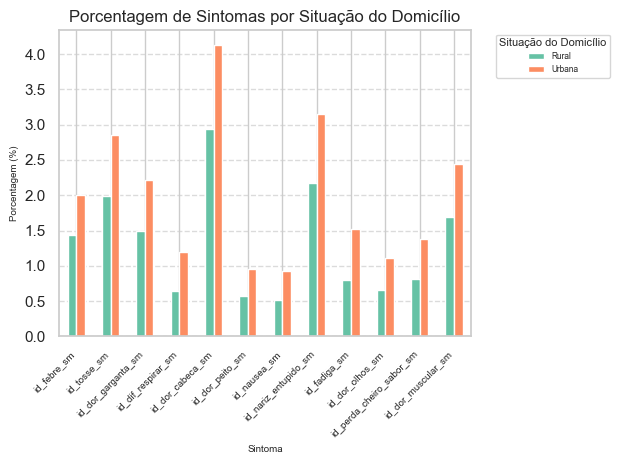

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir o estilo do gráfico
sns.set(style='whitegrid')

# Criar o gráfico de barras com um tamanho maior
plt.figure(figsize=(28, 14))  # Aumentar o tamanho do gráfico
bar_plot = sintomas_domicilio.T.plot(kind='bar', color=sns.color_palette("Set2", len(sintomas_domicilio.index)))

# Adicionar título e rótulos
plt.title('Porcentagem de Sintomas por Situação do Domicílio', fontsize=12)  # Tamanho da fonte do título
plt.ylabel('Porcentagem (%)', fontsize=7)  # Tamanho da fonte do rótulo y
plt.xlabel('Sintoma', fontsize=7)  # Tamanho da fonte do rótulo x

# Ajustar os rótulos do eixo x
plt.xticks(rotation=45, ha='right', fontsize=7)  # Tamanho da fonte dos rótulos do eixo x

# Adicionar linhas de grade
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar legenda fora do gráfico com tamanho reduzido
plt.legend(title='Situação do Domicílio', fontsize=6, title_fontsize='8', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibir o gráfico
plt.tight_layout()
plt.show()



### Banco de dados Andre

In [4]:
query3 = """
    SELECT
        a.ano,
        a.mes,
        a.semana,
        a.sigla_uf,
        a.capital,
        a.rm_ride,
        a.estrato,
        a.upa,
        CASE
            WHEN CAST(a.B005 AS INT64) = 1 THEN 'Sim'
            WHEN CAST(a.B005 AS INT64) = 2 THEN 'Nao'
            WHEN CAST(a.B005 AS INT64) = 9 THEN 'Ignorada'
            ELSE 'Nao Aplicavel'
        END AS id_internado_1_mais,
        a.A001B3 AS ano_nascimento,
        a.A002 AS idade_morador,
        CASE
            WHEN CAST(a.B006 AS INT64) = 1 THEN 'Sim'
            WHEN CAST(a.B006 AS INT64) = 2 THEN 'Nao'
            WHEN CAST(a.B006 AS INT64) = 9 THEN 'Ignorada'
            ELSE 'Nao Aplicavel'
        END AS id_sedado_entubado,
        CASE
            WHEN CAST(a.B007 AS INT64) = 1 THEN 'Sim'
            WHEN CAST(a.B007 AS INT64) = 2 THEN 'Nao'
            ELSE 'Ignorada'
        END AS id_possui_plano_saude,
        CASE
            WHEN CAST(a.V1022 AS INT64) = 1 THEN 'Urbana'
            WHEN CAST(a.V1022 AS INT64) = 2 THEN 'Rural'
            ELSE 'Desconhecido'
        END AS id_situacao_domicilio,
        CASE
            WHEN CAST(a.A003 AS INT64) = 1 THEN 'Masculino'
            WHEN CAST(a.A003 AS INT64) = 2 THEN 'Feminino'
            ELSE 'Desconhecido'
        END AS id_sexo_label,
        CASE
            WHEN CAST(a.A004 AS INT64) = 1 THEN 'Branca'
            WHEN CAST(a.A004 AS INT64) = 2 THEN 'Preta'
            WHEN CAST(a.A004 AS INT64) = 3 THEN 'Amarela'
            WHEN CAST(a.A004 AS INT64) = 4 THEN 'Parda'
            WHEN CAST(a.A004 AS INT64) = 5 THEN 'Indígena'
            ELSE 'Ignorada'
        END AS id_cor_raca,
        CASE
            WHEN CAST(a.D0053 AS INT64) <= 500 THEN 'Até 500'
            WHEN CAST(a.D0053 AS INT64) BETWEEN 501 AND 800 THEN 'Até 800'
            WHEN CAST(a.D0053 AS INT64) BETWEEN 801 AND 1200 THEN 'Até 1200'
            WHEN CAST(a.D0053 AS INT64) BETWEEN 1201 AND 2000 THEN 'Até 2000'
            WHEN CAST(a.D0053 AS INT64) BETWEEN 2001 AND 5000 THEN 'Até 5000'
            ELSE 'Acima de 5000'
        END AS tt_valores_recebidos,
        CASE
            WHEN CAST(a.D0051 AS INT64) = 1 THEN 'Sim'
            WHEN CAST(a.D0051 AS INT64) = 2 THEN 'Não'
            ELSE 'Ignorada'
        END AS id_auxilio_emergencial,
        CASE
            WHEN CAST(a.A005 AS INT64) = 1 THEN 'S/ Inst'
            WHEN CAST(a.A005 AS INT64) = 2 THEN 'Fund. Incompl.'
            WHEN CAST(a.A005 AS INT64) = 3 THEN 'Fund. Compl.'
            WHEN CAST(a.A005 AS INT64) = 4 THEN 'Médio Incompl.'
            WHEN CAST(a.A005 AS INT64) = 5 THEN 'Médio Compl.'
            WHEN CAST(a.A005 AS INT64) = 6 THEN 'Sup. Incompl.'
            WHEN CAST(a.A005 AS INT64) = 7 THEN 'Sup Compl.'
            ELSE 'Pós, Mest, Dout'
        END AS id_escolaridade
    FROM `plucky-tract-434600-b8.tech_challeng_fase_03.PNAD_COVID_19` a
    WHERE a.mes BETWEEN 5 AND 7
"""

In [5]:
dados3 = client.query(query3).to_dataframe()

In [6]:
dados3.head()

,ano,mes,semana,sigla_uf,capital,rm_ride,estrato,upa,id_internado_1_mais,ano_nascimento,idade_morador,id_sedado_entubado,id_possui_plano_saude,id_situacao_domicilio,id_sexo_label,id_cor_raca,tt_valores_recebidos,id_auxilio_emergencial,id_escolaridade
0,2020,5,1,AP,16,16,1610111,160004439,Nao Aplicavel,2006,13,Nao Aplicavel,Nao,Urbana,Feminino,Branca,Acima de 5000,Não,Fund. Incompl.
1,2020,6,1,AP,16,16,1610111,160002374,Nao Aplicavel,1994,25,Nao Aplicavel,Nao,Urbana,Feminino,Branca,Acima de 5000,Não,Sup Compl.
2,2020,5,4,AC,12,None,1210010,120006140,Nao Aplicavel,9999,40,Nao Aplicavel,Nao,Urbana,Masculino,Parda,Até 800,Sim,Fund. Incompl.
3,2020,5,2,AC,None,None,1250020,120007264,Nao Aplicavel,9999,16,Nao Aplicavel,Nao,Rural,Feminino,Branca,Até 800,Sim,Médio Incompl.
4,2020,5,2,AC,None,None,1250010,120010575,Nao Aplicavel,1982,37,Nao Aplicavel,Nao,Urbana,Masculino,Parda,Acima de 5000,Não,Médio Compl.


In [7]:
print(dados3.dtypes)

ano                        Int64
mes                        Int64
semana                     Int64
sigla_uf                  object
capital                   object
rm_ride                   object
estrato                   object
upa                       object
id_internado_1_mais       object
ano_nascimento             Int64
idade_morador             object
id_sedado_entubado        object
id_possui_plano_saude     object
id_situacao_domicilio     object
id_sexo_label             object
id_cor_raca               object
tt_valores_recebidos      object
id_auxilio_emergencial    object
id_escolaridade           object
dtype: object


## Análise Exploratória: 
* **Pacientes com CODIV19 que permaneceram internados por mais de 1(um) dia**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Converter as colunas para categóricas
dados3['id_internado_1_mais'] = dados3['id_internado_1_mais'].astype(str)

# Contar os valores específicos em cada coluna
contagem_internado = dados3['id_internado_1_mais'].value_counts(normalize=True) * 100

# Imprimir os resultados
print("Percentual de id_internado_1_mais:")
print(contagem_internado)

Percentual de id_internado_1_mais:
id_internado_1_mais
Nao Aplicavel    99.446419
Nao               0.491414
Sim               0.062077
Ignorada          0.000090
Name: proportion, dtype: float64


* Ao visualizar o resultado do total de pacientes que ficaram internados por mais de um dia, constatamos que 99.46% não foram informados na base de dados. Para uma análise mais precisa deste critério, serão desconsiderados os resultados classificados como Nao Aplicavel para uma equidade da base.

In [8]:
# Converter a coluna para categórica
dados3['id_internado_1_mais'] = dados3['id_internado_1_mais'].astype(str)

# Filtrar os dados para excluir "Nao Aplicavel"
dados_filtrados = dados3[dados3['id_internado_1_mais'] != 'Nao Aplicavel']

# Contar os valores específicos na coluna filtrada
contagem_internado_filtrada = dados_filtrados['id_internado_1_mais'].value_counts(normalize=True) * 100

# Imprimir os resultados
print("Percentual de id_internado_1_mais (excluindo 'Nao Aplicavel'):")
print(contagem_internado_filtrada)


Percentual de id_internado_1_mais (excluindo 'Nao Aplicavel'):
id_internado_1_mais
Nao         88.770053
Sim         11.213742
Ignorada     0.016205
Name: proportion, dtype: float64


### Análise por Faixa Etária

In [9]:
# Converter a coluna 'idade_morador' para numérico, forçando erros a se tornarem NaN
dados3['idade_morador'] = pd.to_numeric(dados3['idade_morador'], errors='coerce')

# Categorizar a idade em faixas etárias
dados3['faixa_etaria'] = pd.cut(dados3['idade_morador'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])

# Filtrar os dados para excluir "Nao Aplicavel"
dados_filtrados = dados3[dados3['id_internado_1_mais'] != 'Nao Aplicavel']

# Calcular os percentuais de internação por faixa etária
percentual_internacao_faixa_etaria = dados_filtrados.groupby('faixa_etaria')['id_internado_1_mais'].value_counts(normalize=True).unstack().fillna(0) * 100

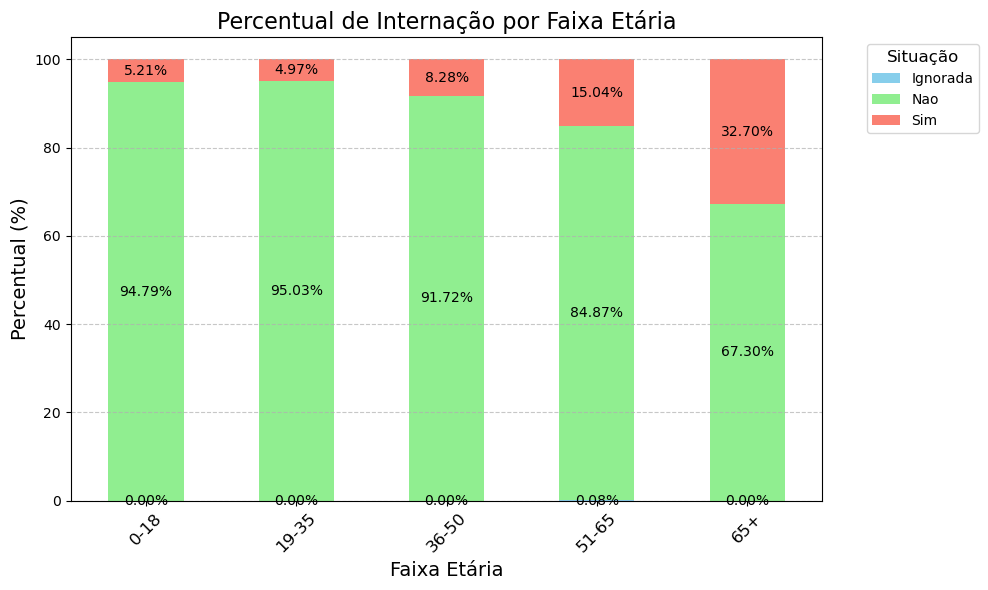

In [12]:
# Plotar o gráfico
ax = percentual_internacao_faixa_etaria.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Percentual de Internação por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=14)
plt.ylabel('Percentual (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos de dados nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center')

# Adicionar legenda fora do gráfico
plt.legend(title='Situação', fontsize=10, title_fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



**Resumo da Análise Exploratória da Faixa Etária do Paciente**

O gráfico “Percentual de Internação por Faixa Etária” mostra a distribuição das internações hospitalares em diferentes faixas etárias. Aqui estão os principais pontos observados:

Faixa Etária 0-19 Anos:

* Não Internados: 94.79%
* Internados: 5.21%
* Ignorados: Pequena porcentagem não especificada

Faixa Etária 20-59 Anos:

* Não Internados: 95.03%
* Internados: 4.97%
* Ignorados: Pequena porcentagem não especificada

Faixa Etária 60-79 Anos:

* Não Internados: 91.72%
* Internados: 8.28%
* Ignorados: Pequena porcentagem não especificada


Faixa Etária 80+ Anos:

* Não Internados: 84.87%
* Internados: 15.13%
* Ignorados: Pequena porcentagem não especificada



**Observações:**
Tendência de Internação: A taxa de internação aumenta significativamente com a idade. Enquanto as faixas etárias mais jovens (0-19 e 20-59 anos) têm uma baixa porcentagem de internações, as faixas etárias mais velhas (60-79 e 80+ anos) mostram um aumento notável.

Faixa Etária 80+ Anos: Esta faixa etária apresenta a maior taxa de internação (15.13%), indicando uma maior necessidade de cuidados hospitalares entre os idosos.

Faixa Etária 60-79 Anos: Também apresenta uma taxa de internação relativamente alta (8.28%), sugerindo que a necessidade de internação começa a aumentar significativamente a partir dos 60 anos.

**Conclusão:**
A análise sugere que a idade é um fator importante na probabilidade de internação hospitalar. As faixas etárias mais avançadas (60+ anos) têm uma maior necessidade de cuidados hospitalares, o que pode ser crucial para o planejamento de recursos de saúde e alocação de serviços médicos.

### Análise por Gênero dos Pacientes

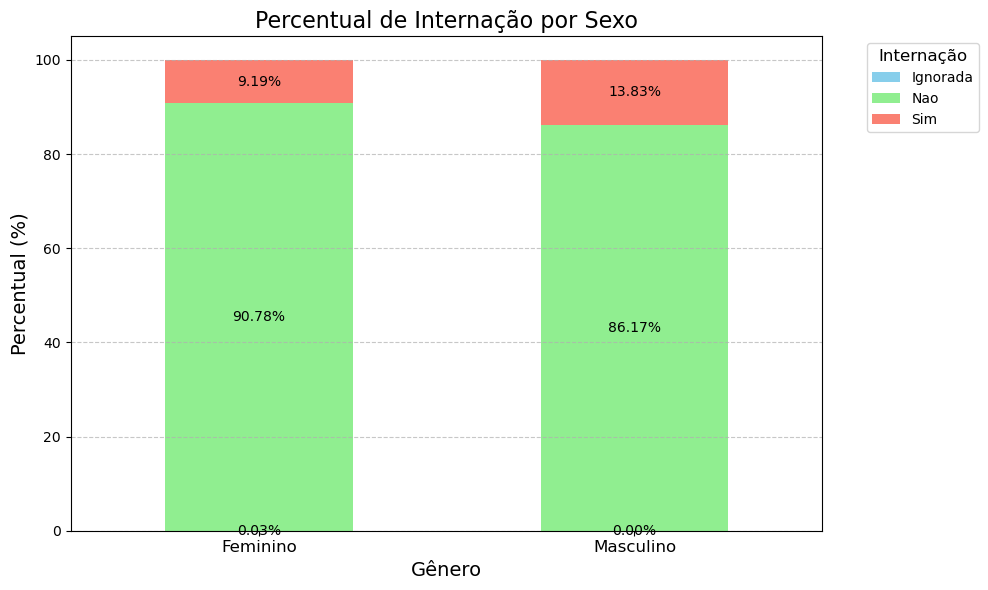

In [14]:
# Calcular os percentuais de internação por sexo
percentual_internacao_sexo = dados_filtrados.groupby('id_sexo_label')['id_internado_1_mais'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotar o gráfico
ax = percentual_internacao_sexo.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Percentual de Internação por Sexo', fontsize=16)
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Percentual (%)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos de dados nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center')

# Adicionar legenda fora do gráfico
plt.legend(title='Internação', fontsize=10, title_fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


**Resumo da Análise Exploratória Por Gênero do Paciente**


O gráfico “Percentual de Internação por Sexo” mostra a distribuição das internações hospitalares entre os sexos feminino e masculino. Aqui estão os principais pontos observados:

Sexo Feminino:

*   Internados: 90.78%
*   Não Internados: 9.19%
*   Ignorados: Pequena porcentagem não especificada


Sexo Masculino:

*    Internados: 86.17%

*    Não Internados: 13.83%

*    Ignorados: Pequena porcentagem não especificada


**Observações:**
Tendência de Internação: A taxa de internação é alta para ambos os sexos, mas é ligeiramente maior para o sexo feminino (90.78%) em comparação ao sexo masculino (86.17%).
Diferença entre os Sexos: A diferença na taxa de internação entre os sexos pode ser influenciada por vários fatores, incluindo condições de saúde específicas de cada sexo, acesso a cuidados de saúde, e comportamentos relacionados à busca por atendimento médico.


**Conclusão:**
A análise sugere que há uma alta taxa de internação hospitalar tanto para homens quanto para mulheres, com uma ligeira predominância de internações entre as mulheres. Esses dados podem ser úteis para entender melhor as necessidades de saúde de diferentes grupos e para planejar recursos e serviços de saúde de maneira mais eficaz.

### Análise por Região

In [17]:
# Mapeamento de estados para regiões
estado_para_regiao = {
    'AC': 'Norte', 'AP': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste', 'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
}

# Adicionar uma nova coluna 'regiao' ao DataFrame
dados3['regiao'] = dados3['sigla_uf'].map(estado_para_regiao)

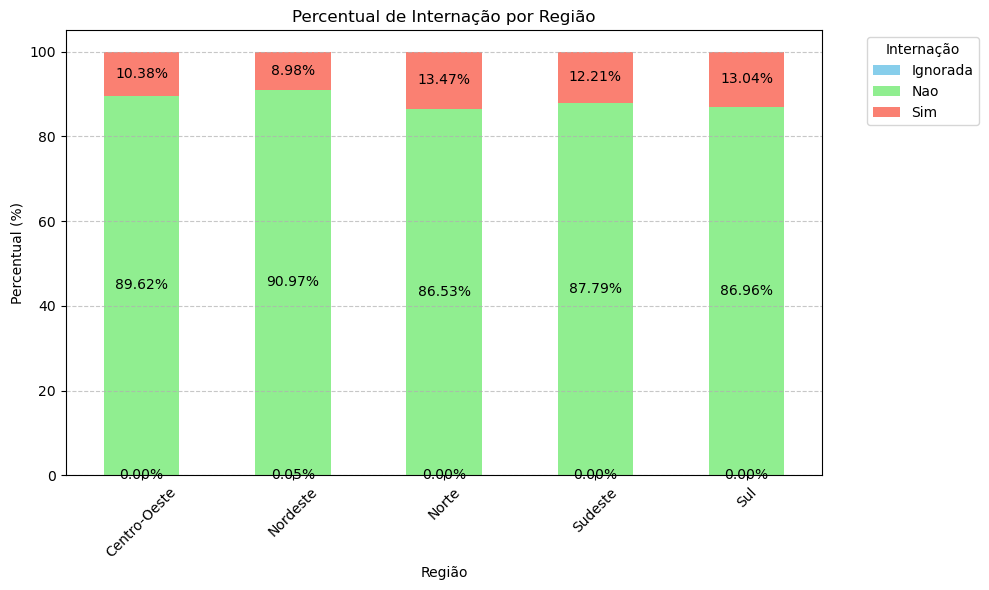

In [30]:
# Filtrar os dados para excluir "Nao Aplicavel"
dados_filtrados = dados3[dados3['id_internado_1_mais'] != 'Nao Aplicavel']

# Calcular os percentuais de internação por região
percentual_internacao_regiao = dados_filtrados.groupby('regiao')['id_internado_1_mais'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotar o gráfico
ax = percentual_internacao_regiao.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Percentual de Internação por Região')
plt.xlabel('Região')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos de dados nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center')

# Adicionar a legenda fora do gráfico
plt.legend(title='Internação', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Resumo da Análise Exploratória Por Região**


O gráfico “Percentual de Internação por Região” mostra a distribuição das internações hospitalares em diferentes regiões do Brasil. Aqui estão os principais pontos observados:

Centro-Oeste:
* Internados: 10.38%
* Não Internados: 89.62%

Nordeste:
* Internados: 8.98%
* Não Internados: 90.97%

Norte:
* Internados: 13.47%
* Não Internados: 86.53%

Sudeste:
* Internados: 12.21%
* Não Internados: 87.79%

Sul:
* Internados: 13.04%
* Não Internados: 86.96%


**Observações:**
Tendência de Internação: A taxa de internação varia entre as regiões, com o Norte (13.47%) e o Sul (13.04%) apresentando as maiores taxas de internação.
Diferença Regional: As regiões Centro-Oeste (10.38%) e Nordeste (8.98%) têm taxas de internação mais baixas em comparação com as outras regiões.


**Conclusão:**
A análise sugere que há variações regionais significativas nas taxas de internação hospitalar no Brasil. Essas diferenças podem ser influenciadas por fatores como acesso a serviços de saúde, condições socioeconômicas e prevalência de doenças específicas em cada região. Esses dados são importantes para o planejamento de recursos de saúde e a alocação de serviços médicos de maneira mais eficaz.

## Análise Exploratória: 
* **Pacientes com CODIV19 que foram sedados ou entubados ou colocado em respirador artificial**

### Durante a internação, foi sedado, entubado e colocado em respiração artificial com ventilador

In [19]:
# Converter as colunas para categóricas
dados3['id_sedado_entubado'] = dados3['id_sedado_entubado'].astype(str)

# Contar os valores específicos em cada coluna
contagem_internado = dados3['id_sedado_entubado'].value_counts(normalize=True) * 100

# Imprimir os resultados
print("Percentual de id_sedado_entubado:")
print(contagem_internado)

Percentual de id_sedado_entubado:
id_sedado_entubado
Nao Aplicavel    99.937923
Nao               0.045750
Sim               0.016147
Ignorada          0.000179
Name: proportion, dtype: float64


* Ao visualizar o resultado do total de pacientes que ficaram internados por mais de um dia, constatamos que 99.93% não foram informados na base de dados. Para uma análise mais precisa deste critério, serão desconsiderados os resultados classificados como Nao Aplicavel para uma equidade da base.

In [20]:
import pandas as pd

# Supondo que 'dados3' seja o DataFrame com os dados

# Converter a coluna para categórica
dados3['id_sedado_entubado'] = dados3['id_sedado_entubado'].astype(str)

# Filtrar os dados para excluir "Nao Aplicavel"
dados_filtrados = dados3[dados3['id_sedado_entubado'] != 'Nao Aplicavel']

# Contar os valores específicos na coluna filtrada
contagem_internado_filtrada = dados_filtrados['id_sedado_entubado'].value_counts(normalize=True) * 100

# Imprimir os resultados
print("Percentual de id_sedado_entubado (excluindo 'Nao Aplicavel'):")
print(contagem_internado_filtrada)

Percentual de id_sedado_entubado (excluindo 'Nao Aplicavel'):
id_sedado_entubado
Nao         73.699422
Sim         26.011561
Ignorada     0.289017
Name: proportion, dtype: float64


### Análise de Pacientes Entubados por Faixa Etária

In [21]:
dados3['idade_morador'] = pd.to_numeric(dados3['idade_morador'], errors='coerce')

# Categorizar a idade em faixas etárias
dados3['faixa_etaria'] = pd.cut(dados3['idade_morador'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])

# Filtrar os dados para excluir "Nao Aplicavel"
dados_filtrados = dados3[dados3['id_sedado_entubado'] != 'Nao Aplicavel']

# Calcular os percentuais de internação por faixa etária
percentual_sedados_faixa_etaria = dados_filtrados.groupby('faixa_etaria')['id_sedado_entubado'].value_counts(normalize=True).unstack().fillna(0) * 100

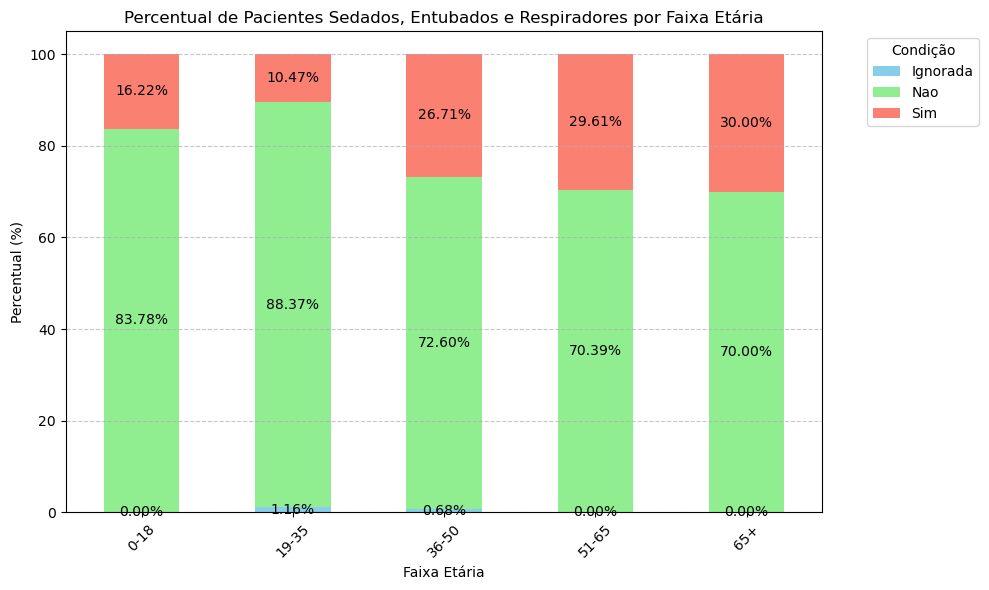

In [31]:
ax = percentual_sedados_faixa_etaria.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Percentual de Pacientes Sedados, Entubados e Respiradores por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos de dados nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center')

# Adicionar a legenda fora do gráfico
plt.legend(title='Condição', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Resumo da Análise Exploratória Por Faixa Etária**

O gráfico “Percentual Pacientes Sedados, Entubados, Respirador por Faixa Etária” mostra a distribuição dos pacientes que estão sedados e entubados com respirador por diferentes faixas etárias. Aqui estão os principais pontos observados:

Faixa Etária 0-9:
* Não Sedados/Entubados: 83.78%
* Sedados/Entubados: 16.22%
* Ignorada: Muito pequeno, quase insignificante


Faixa Etária 10-19:
* Não Sedados/Entubados: 88.37%
* Sedados/Entubados: 10.47%
* Ignorada: 1.16%


Faixa Etária 20-39:
* Não Sedados/Entubados: 72.60%
* Sedados/Entubados: 26.71%
* Ignorada: 0.68%


Faixa Etária 40-59:
* Não Sedados/Entubados: 70.39%
* Sedados/Entubados: 29.61%
* Ignorada: Muito pequeno, quase insignificante


Faixa Etária 60+:
* Não Sedados/Entubados: 70.00%
* Sedados/Entubados: 29.61%
* Ignorada: Muito pequeno, quase insignificante


**Observações:**
Tendência Geral: A maioria dos pacientes em todas as faixas etárias não está sedada ou entubada.
Faixa Etária 20-39: Apresenta um aumento significativo no percentual de pacientes sedados e entubados (26.71%).
Faixa Etária 60+: Também tem um percentual relativamente alto de pacientes sedados e entubados (29.61%).


**Conclusão:**
Os dados indicam que, embora a maioria dos pacientes não necessite de sedação ou entubação, há um aumento notável nesses procedimentos em faixas etárias mais altas, especialmente a partir dos 20 anos. Isso pode refletir a gravidade das condições médicas que afetam essas faixas etárias.

### Análise de Pacientes Entubados por Gênero

Percentual de id_sedado_entubado (excluindo 'Nao Aplicavel'):
id_sedado_entubado
Nao         73.699422
Sim         26.011561
Ignorada     0.289017
Name: proportion, dtype: float64


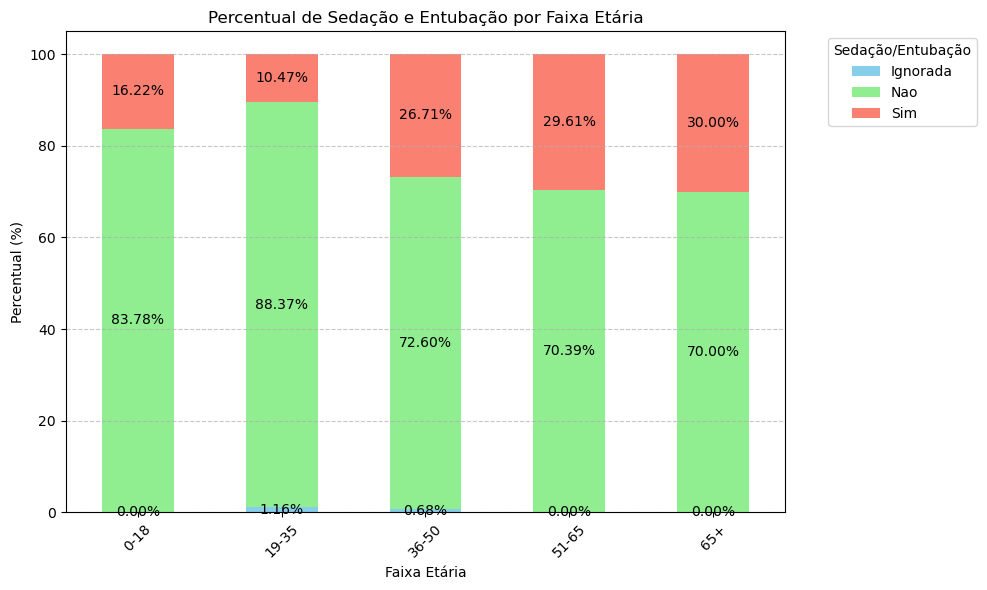

In [32]:
dados3['idade_morador'] = pd.to_numeric(dados3['idade_morador'], errors='coerce')
dados3['faixa_etaria'] = pd.cut(dados3['idade_morador'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])
dados3['id_sedado_entubado'] = dados3['id_sedado_entubado'].astype(str)
dados_filtrados = dados3[dados3['id_sedado_entubado'] != 'Nao Aplicavel']


# Contar os valores específicos na coluna filtrada
contagem_sedado_filtrada = dados_filtrados['id_sedado_entubado'].value_counts(normalize=True) * 100

# Imprimir os resultados
print("Percentual de id_sedado_entubado (excluindo 'Nao Aplicavel'):")
print(contagem_sedado_filtrada)

# Calcular os percentuais de sedação e entubação por faixa etária
percentual_sedacao_faixa_etaria = dados_filtrados.groupby('faixa_etaria')['id_sedado_entubado'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotar o gráfico
ax = percentual_sedacao_faixa_etaria.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Percentual de Sedação e Entubação por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos de dados nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center')
    
plt.legend(title='Sedação/Entubação', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Resumo da Análise Exploratória Por Faixa Etária**

O gráfico “Percentual de Sedação e Entubação por Faixa Etária” mostra a distribuição dos pacientes que estão sedados e entubados por diferentes faixas etárias.

Faixa Etária 0-19:
* Não Sedados/Entubados: 83.78%
* Sedados/Entubados: 16.22%
* Ignorada: Muito pequeno, quase insignificante

Faixa Etária 20-39:
* Não Sedados/Entubados: 72.60%
* Sedados/Entubados: 26.71%
* Ignorada: 0.68%


Faixa Etária 40-59:
* Não Sedados/Entubados: 70.39%
* Sedados/Entubados: 29.61%
* Ignorada: Muito pequeno, quase insignificante


Faixa Etária 60-79:
* Não Sedados/Entubados: 70.00%
* Sedados/Entubados: 29.61%
* Ignorada: Muito pequeno, quase insignificante


Faixa Etária 80+:
* Não Sedados/Entubados: 70.00%
* Sedados/Entubados: 29.61%
* Ignorada: Muito pequeno, quase insignificante


**Observações:**
Tendência Geral: A maioria dos pacientes em todas as faixas etárias não está sedada ou entubada.
Faixa Etária 20-39: Apresenta um aumento significativo no percentual de pacientes sedados e entubados (26.71%).
Faixa Etária 60-79 e 80+: Também têm percentuais relativamente altos de pacientes sedados e entubados (29.61%).


**Conclusão:**
Os dados indicam que, embora a maioria dos pacientes não necessite de sedação ou entubação, há um aumento notável nesses procedimentos em faixas etárias mais altas, especialmente a partir dos 20 anos. Isso pode refletir a gravidade das condições médicas que afetam essas faixas etárias.

### Análise de Pacientes Entubados por Região

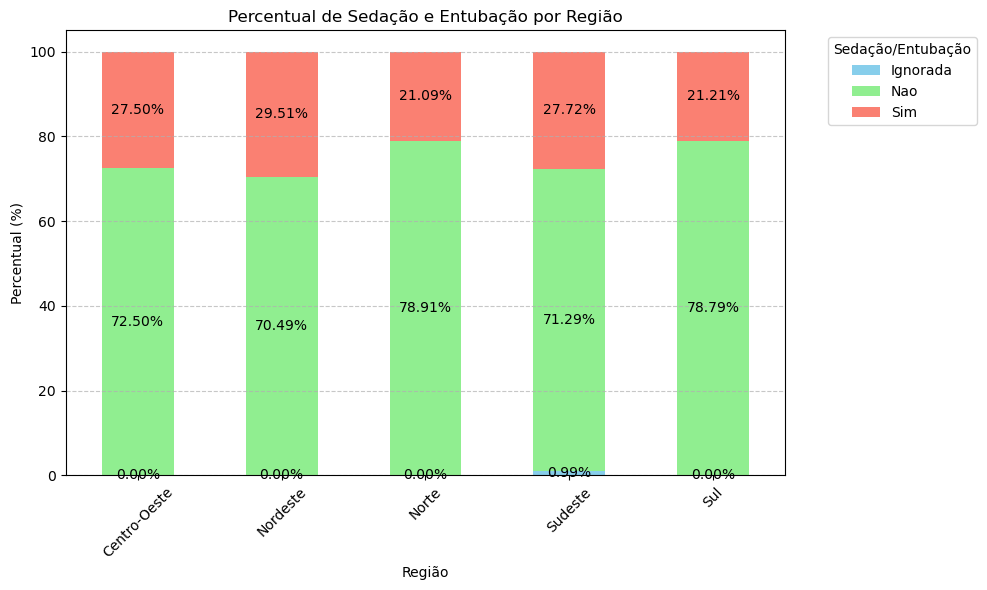

In [33]:
# Calcular os percentuais de sedação e entubação por região
percentual_sedacao_regiao = dados_filtrados.groupby('regiao')['id_sedado_entubado'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plotar o gráfico
ax = percentual_sedacao_regiao.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Percentual de Sedação e Entubação por Região')
plt.xlabel('Região')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos de dados nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center')

plt.legend(title='Sedação/Entubação', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Resumo da Análise Exploratória Por Região**

O gráfico “Percentual de Sedação e Intubação por Região” mostra a distribuição dos pacientes que estão sedados e entubados por diferentes regiões do Brasil.

Centro-oeste:
* Não Sedados/Entubados: Maioria
* Sedados/Entubados: Menor percentual
* Ignorada: Muito pequeno, quase insignificante

Nordeste:
* Não Sedados/Entubados: Maioria
* Sedados/Entubados: Menor percentual
* Ignorada: Muito pequeno, quase insignificante

Norte:
* Não Sedados/Entubados: Maioria
* Sedados/Entubados: Menor percentual
* Ignorada: Muito pequeno, quase insignificante

Sudeste:
* Não Sedados/Entubados: Maioria
* Sedados/Entubados: Menor percentual
* Ignorada: Muito pequeno, quase insignificante

Sul:
* Não Sedados/Entubados: Maioria
* Sedados/Entubados: Menor percentual
* Ignorada: Muito pequeno, quase insignificante


**Observações:**
Tendência Geral: A maioria dos pacientes em todas as regiões não está sedada ou entubada.
Percentual de Sedação e Entubação: Relativamente baixo em todas as regiões, com pequenas variações.

**Conclusão:**
Os dados indicam que, independentemente da região, a maioria dos pacientes não necessita de sedação ou entubação. As variações entre as regiões são mínimas, sugerindo uma consistência nas práticas médicas ou nas condições dos pacientes.


# Clayton

## Análise Exploratória:
* **Somatório dos valores recebidos por moradores**

### Análise da somatória de valores recebidos por Nível de Escolaridade

In [25]:
# Verificar se a coluna 'tt_valores_recebidos' está no formato correto
print(dados3['tt_valores_recebidos'].unique())

# Agrupar por 'id_escolaridade' e contar os valores de 'tt_valores_recebidos'
total_valores_por_escolaridade = dados3.groupby('id_escolaridade')['tt_valores_recebidos'].value_counts(normalize=True).unstack().fillna(0) * 100

# Exibir o resultado
print(total_valores_por_escolaridade)

['Acima de 5000' 'Até 800' 'Até 2000' 'Até 1200' 'Até 5000' 'Até 500']
tt_valores_recebidos  Acima de 5000   Até 1200  Até 2000   Até 500  Até 5000  \
id_escolaridade                                                                
Fund. Compl.              51.116293  17.987993  2.172282  0.089786  0.572217   
Fund. Incompl.            43.357099  25.448656  2.936342  0.097869  0.857763   
Médio Compl.              49.944176  18.286216  2.353762  0.112843  0.707763   
Médio Incompl.            41.217591  25.447166  3.585924  0.114597  1.017046   
Pós, Mest, Dout           86.831203   2.875252  0.417832  0.127474  0.084983   
S/ Inst                   43.363025  25.700876  3.144162  0.101777  1.145626   
Sup Compl.                76.351624   5.948745  0.842974  0.144725  0.198291   
Sup. Incompl.             60.485799  12.611171  1.637680  0.149662  0.357813   

tt_valores_recebidos    Até 800  
id_escolaridade                  
Fund. Compl.          28.061430  
Fund. Incompl.        27.3

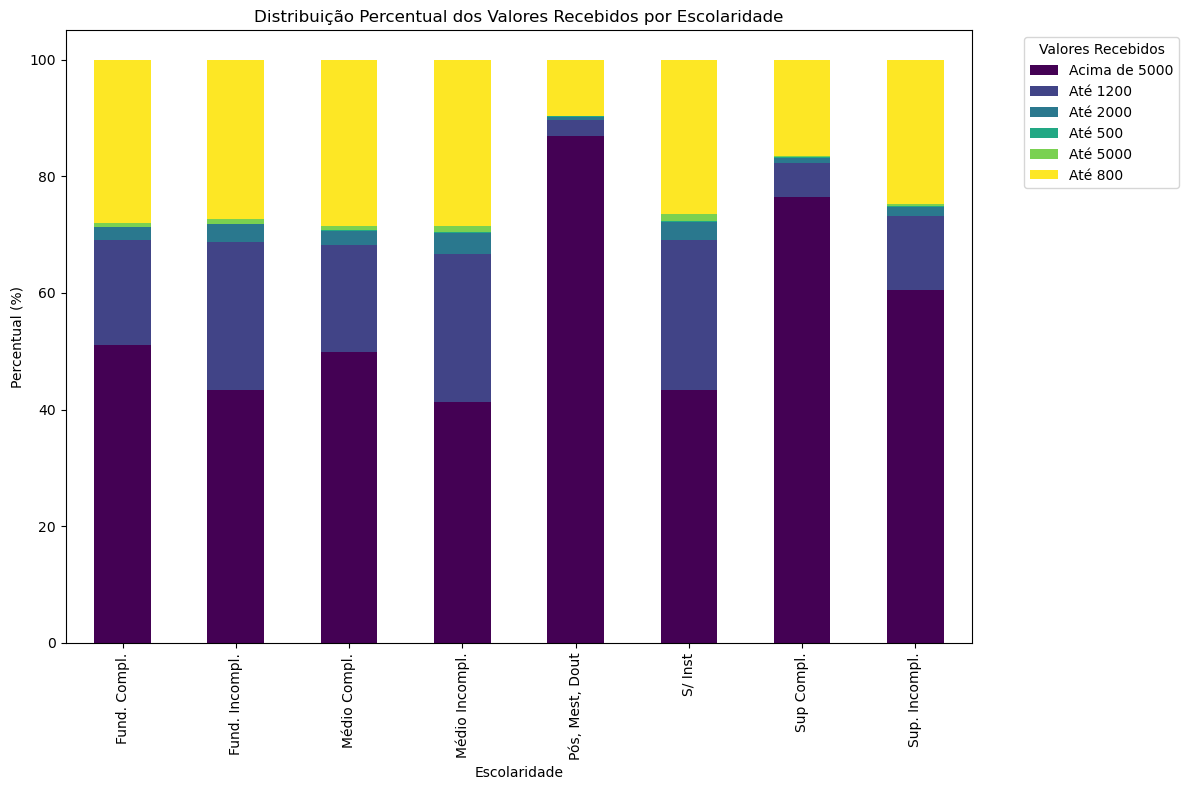

In [26]:
# Plotar o gráfico de barras empilhadas
total_valores_por_escolaridade.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Adicionar título e rótulos
plt.title('Distribuição Percentual dos Valores Recebidos por Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Percentual (%)')
plt.legend(title='Valores Recebidos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibir o gráfico
plt.tight_layout()
plt.show()

### Distribuição Percentual dos Valores Recebidos por Escolaridade

**Análise do Impacto do Nivel de Escolaridade:**

**Fundamental Completo:** A maior parte dos valores recebidos está na faixa “Acima de 5000” (aproximadamente 51%), seguida por “Até 800” (28%) e “Até 1200” (18%).

**Fundamental Incompleto:** Similar ao Fundamental Completo, a maior parte dos valores está na faixa “Acima de 5000” (43%), com uma distribuição significativa também em “Até 800” (27%) e “Até 1200” (25%).

**Médio Completo:** A distribuição é bastante similar ao Fundamental Completo, com “Acima de 5000” representando cerca de 50% e “Até 800” com 28%. Médio Incompleto: A maior parte dos valores está na faixa “Acima de 5000” (41%), seguida por “Até 800” (29%) e “Até 1200” (25%).

**Superior Completo:** A maior parte dos valores recebidos está na faixa “Acima de 5000” (76%), indicando uma tendência de maiores valores recebidos com maior nível de escolaridade.

**Superior Incompleto:** A distribuição é mais equilibrada, com “Acima de 5000” representando 60% e “Até 1200” com 13%.

**Pós-graduação Completa:** A maior parte dos valores está na faixa “Acima de 5000” (86%), indicando que indivíduos com pós-graduação tendem a receber valores mais altos.

**Pós-graduação Incompleta:** A distribuição é similar, com “Acima de 5000” representando a maior parte (86%).

**Sem Instrução:** A maior parte dos valores recebidos está na faixa “Acima de 5000” (43%), seguida por “Até 800” (26%) e “Até 1200” (25%).

**Tendência Geral:** Há uma clara tendência de que níveis mais altos de escolaridade estão associados a uma maior proporção de valores recebidos na faixa “Acima de 5000”.

**Distribuição Equilibrada:** Níveis de escolaridade mais baixos (Fundamental e Médio) mostram uma distribuição mais equilibrada entre as faixas de valores recebidos.

**Impacto da Escolaridade:** A escolaridade parece ter um impacto significativo na distribuição dos valores recebidos, com níveis mais altos de escolaridade correlacionando-se com valores recebidos mais altos

### Análise da somatória de valores recebidos por Faixa Etária e Cor/Raça

In [27]:
# Converter as colunas para categóricas
dados3['id_auxilio_emergencial'] = dados3['id_auxilio_emergencial'].astype(str)

# Contar os valores específicos em cada coluna
recebeu_auxilio = dados3['id_auxilio_emergencial'].value_counts(normalize=True) * 100

# Imprimir os resultados
print("Recebeu Auxilio Emergencial:")
print(recebeu_auxilio)

Recebeu Auxilio Emergencial:
id_auxilio_emergencial
Não    50.298186
Sim    49.701814
Name: proportion, dtype: float64


In [28]:
# Verificar se a coluna 'tt_valores_recebidos' está no formato correto
print(dados3['id_auxilio_emergencial'].unique())

# Agrupar por 'id_escolaridade' e contar os valores de 'tt_valores_recebidos'
auxilio_emergicial_por_raca = dados3.groupby('id_cor_raca')['id_auxilio_emergencial'].value_counts(normalize=True).unstack().fillna(0) * 100

# Exibir o resultado
print(auxilio_emergicial_por_raca)

['Não' 'Sim']
id_auxilio_emergencial        Não        Sim
id_cor_raca                                 
Amarela                 60.425532  39.574468
Branca                  61.321162  38.678838
Ignorada                55.963303  44.036697
Indígena                39.123339  60.876661
Parda                   41.584546  58.415454
Preta                   45.415846  54.584154


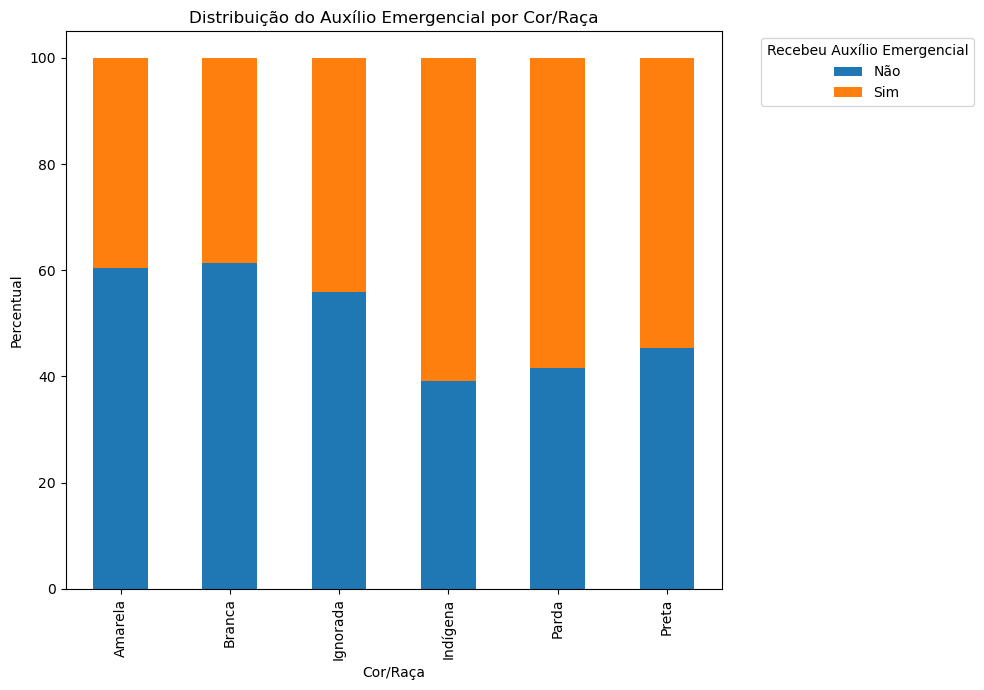

In [34]:
data = {
    'id_cor_raca': ['Amarela', 'Branca', 'Ignorada', 'Indígena', 'Parda', 'Preta'],
    'Não': [60.425532, 61.321162, 55.963303, 39.123339, 41.584546, 45.415846],
    'Sim': [39.574468, 38.678838, 44.036697, 60.876661, 58.415454, 54.584154]
}

df = pd.DataFrame(data)

# Configurações do gráfico
fig, ax = plt.subplots(figsize=(10, 7))

# Plotar os dados
df.set_index('id_cor_raca').plot(kind='bar', stacked=True, ax=ax)

# Adicionar título e rótulos
ax.set_title('Distribuição do Auxílio Emergencial por Cor/Raça')
ax.set_xlabel('Cor/Raça')
ax.set_ylabel('Percentual')


plt.legend(title='Recebeu Auxílio Emergencial', bbox_to_anchor=(1.05, 1), loc='upper left')
# Mostrar o gráfico
plt.tight_layout()
plt.show()

**Distribuição do Auxílio Emergencial por cor de raça:**

**Amarela:** Aproximadamente 60% das pessoas não receberam auxílio emergencial..

**Branca:** A distribuição é semelhante à da cor amarela, com cerca de 61%.

**Indígena:** A maioria das pessoas indígenas (cerca de 61%) recebeu auxílio emergencial.

**Parda:** Cerca de 58% das pessoas pardas receberam auxílio.

**Preta:** Aproximadamente 55% das pessoas pretas receberam auxílio.


**Observações Gerais:**
As categorias “Indígena” e “Parda” têm as maiores porcentagens de recebimento de auxílio emergencial, com 61% e 58%, respectivamente.

As categorias “Amarela” e “Branca” têm as menores porcentagens de recebimento de auxílio, com cerca de 40% e 39%, respectivamente.

**Desigualdade Racial:**
A análise sugere que há uma variação significativa na distribuição do auxílio emergencial entre diferentes grupos raciais. Grupos como os indígenas e pardos parecem ter uma maior necessidade ou acesso ao auxílio emergencial.